In [1]:
!pip install category-encoders 

In [20]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report
import category_encoders as ce  # For frequency encoding
import ast
from collections import Counter
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from ast import literal_eval
from math import log2
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
papers_df = pd.read_csv('C:/Users/maria/OneDrive/Documentos/Thesis/dataset_3/graph_papers_full.csv', encoding='utf-8')
papers_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,Parsed_BERTopics,Gender_Counts,Gender_Numeric_Avg,First_Gender,First_Gender_Value,Last_Gender,Last_Gender_Value,TaxoEntities_Count,Num_Unique_Entities,Entity_Buckets
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,...,"{'B0': 1, 'B124': 7, 'B-1': 4}","{'female': 2, 'male': 2, 'unknown': 2}",0.000000,female,1.0,unknown,0.0,"Counter({('GBIF:3183002', 'clove'): 11, ('GBIF...",68,60
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,...,"{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}","{'male': 6, 'female': 4, 'unknown': 1, 'mostly...",-0.208333,male,-1.0,mostly_male,-0.5,"Counter({('GBIF:5219788', 'Pseudomys higginsi'...",92,80
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,...,"{'B-1': 1, 'B177': 11}","{'female': 1, 'male': 1}",0.000000,female,1.0,male,-1.0,Counter(),0,0
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,...,"{'B0': 1, 'B4': 11, 'B-1': 4}",{'female': 2},1.000000,female,1.0,female,1.0,"Counter({('GBIF:3189949', 'guarana'): 33, ('GB...",23,20
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,...,"{'B-1': 11, 'B45': 2, 'B53': 1}","{'male': 7, 'female': 7}",0.000000,male,-1.0,male,-1.0,"Counter({('GBIF:4494312', 'Spilomena beata Blü...",8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"['female', 'male', 'male', 'male', 'female', '...",0.000000,...,"{'B0': 1, 'B32': 5, 'B-1': 7, 'B91': 1}","{'female': 3, 'male': 5}",-0.250000,female,1.0,male,-1.0,"Counter({('GBIF:5073713', 'Drosophila melanoga...",33,20
1005,"['Think globally, measure locally: The MIREN s...",Ecology and Evolution,"['Haider', 'Lembrechts', 'Mcdougall', 'Pauchar...","['Sylvia Haider', 'Jonas J. Lembrechts', 'Keit...",['Climate change and other global change drive...,https://u-picardie.hal.science/hal-03619105/do...,NaN,True,"['female', 'male', 'male', 'male', 'male', 'fe...",13.793103,...,"{'B0': 1, 'B90': 1, 'B-1': 9, 'B138': 1, 'B78'...","{'female': 22, 'male': 28, 'unknown': 8}",-0.103448,female,1.0,male,-1.0,"Counter({('GBIF:8121923', 'Taraxacum officinal...",34,20
1006,['Adaptation and plasticity in aboveground all...,Ecology and Evolution,"['Vizcaíno-Palomar', 'Ibáñez', 'González-Martí...","['Natalia Vizcaíno-Palomar', 'Inés Ibáñez', 'S...","[""Plant species aboveground allometry

In [4]:
def parse_LDAtopics(row):
    try:
        # Convert string representation of dictionary to actual dictionary
        topics_dict = ast.literal_eval(row)
        if isinstance(topics_dict, dict):
            # Prepend 'L' to each topic number in the keys
            return {f"L{key}": value for key, value in topics_dict.items()}
    except ValueError as e:
        print(f"Error parsing row: {e}")  # Print the error message if there's an issue
        return {}
    return {}

# Example DataFrame column parsing
papers_df['Parsed_TopicsLDA'] = papers_df['TopicsLDA'].apply(parse_LDAtopics)



def parse_and_count_topics(topic_string):
    # Check if the topic_string is NaN
    if pd.isna(topic_string):
        return np.nan
    # Convert the string representation of a list to an actual list using ast.literal_eval
    topic_list = ast.literal_eval(topic_string)
    # Create a Counter dictionary from the list to count the occurrence of each topic
    topic_counter = Counter(f"B{topic}" for topic in topic_list)
    return dict(topic_counter)


# Apply the function to each row in the 'Chunks_BERTopics' column to create the new 'Parsed_BERTopics' column
papers_df['Parsed_BERTopics'] = papers_df['Chunks_BERTopics'].apply(parse_and_count_topics)

def count_unique_entities_per_row_and_sort(column):
    # Process each row as a list of tuples
    #return column.apply(lambda x: {i: x.count(i) for i in set(x)} if isinstance(x, list) and x else {})
    return column.apply(lambda x: {k: v for k, v in sorted({i: x.count(i) for i in set(x)}.items(), key=lambda item: item[1], reverse=True)} if isinstance(x, list) and x else {})


def safely_convert_to_list(column):
    # Convert strings that represent lists or tuples safely
    return column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and (x.startswith('[') or x.startswith('(')) else x)

def safe_flatten_and_count(row):
    try:
        # Assuming the row is a properly formatted string list of lists
        evaluated_row = ast.literal_eval(row)
        flattened = [(item[0], item[1]) for sublist in evaluated_row for item in sublist]
        return Counter(flattened)
    except ValueError:
        # Handle or log the error as appropriate
        return Counter()

# Apply this function to the 'TaxoEntitiesMD2_GBIF' column
# This assumes the rest of your DataFrame manipulation has worked as expected
papers_df['TaxoEntities_Count'] = papers_df['TaxoEntitiesMD2_GBIF'].apply(safe_flatten_and_count)

        
papers_df

,title_s,journalTitle_s,authLastName_s,authFullName_s,abstract_s,fileMain_s,ePublicationDateY_i,Complete,Genders,unknownGenders,...,Parsed_BERTopics,Gender_Counts,Gender_Numeric_Avg,First_Gender,First_Gender_Value,Last_Gender,Last_Gender_Value,TaxoEntities_Count,Num_Unique_Entities,Entity_Buckets
0,"[""Exploring farmers' agrobiodiversity manageme...",People and Nature,"['Mariel', 'Carrière', 'Penot', 'Danthu', 'Raf...","['Juliette Mariel', 'Stéphanie M. Carrière', '...","[""1. Interactions between farmers and agrobiod...",https://hal.inrae.fr/hal-03461601/document,NaN,True,"['female', 'female', 'male', 'male', 'unknown'...",33.333333,...,"{'B0': 1, 'B124': 7, 'B-1': 4}","{'female': 2, 'male': 2, 'unknown': 2}",0.000000,female,1.0,unknown,0.0,"{('GBIF:3183002', 'clove'): 11, ('GBIF:3183002...",68,60
1,['Interpreting the mammal deposits of Cloggs C...,People and Nature,"['Mcdowell', 'David', 'Mullett', 'Fresløv', 'D...","['Matthew Mcdowell', 'Bruno David', 'Russell M...","[""Palaeontological animal bone deposits are ra...",https://hal.science/hal-03829927/document,NaN,True,"['male', 'male', 'male', 'female', 'unknown', ...",8.333333,...,"{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}","{'male': 6, 'female': 4, 'unknown': 1, 'mostly...",-0.208333,male,-1.0,mostly_male,-0.5,"{('GBIF:9065640', 'Tyto novaehollandiae novaeh...",92,80
2,['An ecological theory of changing human popul...,People and Nature,"['Henderson', 'Loreau']","['Kirsten Henderson', 'Michel Loreau']",['The dependence of humans on nature has come ...,https://hal.science/hal-02350603/document,NaN,True,"['female', 'male']",0.000000,...,"{'B-1': 1, 'B177': 11}","{'female': 1, 'male': 1}",0.000000,female,1.0,male,-1.0,{},0,0
3,"['Local knowledge, know‐how and knowledge mobi...",People and Nature,"['Congretel', 'Pinton']","['Mélanie Congretel', 'Florence F. Pinton']","[""More than 30 years after the 1988 Declaratio...",https://shs.hal.science/halshs-02937670/document,NaN,True,"['female', 'female']",0.000000,...,"{'B0': 1, 'B4': 11, 'B-1': 4}",{'female': 2},1.000000,female,1.0,female,1.0,"{('GBIF:5786457', 'Sateré Marmoset'): 3, ('GBI...",23,20
4,['From biodiversity to health: Quantifying the...,People and Nature,"['Ulrich', 'Batáry', 'Baudry', 'Beaumelle', 'B...","['Werner Ulrich', 'Péter Batáry', 'Julia Baudr...",['Ample evidence suggests positive effects of ...,https://cnam.hal.science/hal-04080723/document,NaN,True,"['male', 'male', 'female', 'female', 'male', '...",0.000000,...,"{'B-1': 11, 'B45': 2, 'B53': 1}","{'male': 7, 'female': 7}",0.000000,male,-1.0,male,-1.0,"{('GBIF:4494312', 'Spilomena beata Blüthgen'):...",8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,['Unidirectional response to bidirectional sel...,Ecology and Evolution,"['Renneville', 'Millot', 'Agostini', 'Carmigna...","['Clémentine Renneville', 'Alexis Millot', 'Si...",['Anthropogenic perturbations such as harvesti...,https://hal.sorbonne-universite.fr/hal-0295053...,NaN,True,"['female', 'male', 'male', 'male', 'female', '...",0.000000,...,"{'B0': 1, 'B32': 5, 'B-1': 7, 'B91': 1}","{'female': 3, 'male': 5}",-0.250000,female,1.0,male,-1.0,"{('GBIF:2368377', 'Oryzias latipes'): 2, ('GBI...",33,20
1005,"['Think globally, measure locally: The MIREN s...",Ecology and Evolution,"['Haider', 'Lembrechts', 'Mcdougall', 'Pauchar...","['Sylvia Haider', 'Jonas J. Lembrechts', 'Keit...",['Climate change and other global change drive...,https://u-picardie.hal.science/hal-03619105/do...,NaN,True,"['female', 'male', 'male', 'male', 'male', 'fe...",13.793103,...,"{'B0': 1, 'B90': 1, 'B-1': 9, 'B138': 1, 'B78'...","{'female': 22, 'male': 28, 'unknown': 8}",-0.103448,female,1.0,male,-1.0,"{('GBIF:4667268', 'Agustina'): 2, ('GBIF:85988...",34,20
1006,['Adaptation and plasticity in aboveground all...,Ecology and Evolution,"['Vizcaíno-Palomar', 'Ibáñez', 'González-Martí...","['Natalia Vizcaíno-Palomar', 'Inés Ibáñez', 'S...","[""Plant species aboveground allometry can be

In [5]:
papers_df.columns.to_list()

['title_s',
 'journalTitle_s',
 'authLastName_s',
 'authFullName_s',
 'abstract_s',
 'fileMain_s',
 'ePublicationDateY_i',
 'Complete',
 'Genders',
 'unknownGenders',
 'content_text',
 'cleaned_content_text',
 'contentLen',
 'chunks',
 'numChunks',
 'Chunks_BERTopics',
 'TopicsLDA',
 'TaxoEntitiesMD2_GBIF',
 'releasedDateY_i',
 'Parsed_TopicsLDA',
 'Parsed_BERTopics',
 'Gender_Counts',
 'Gender_Numeric_Avg',
 'First_Gender',
 'First_Gender_Value',
 'Last_Gender',
 'Last_Gender_Value',
 'TaxoEntities_Count',
 'Num_Unique_Entities',
 'Entity_Buckets']

In [6]:
classifier_papers = papers_df[['Genders', 'Gender_Counts', 'Gender_Numeric_Avg', 'First_Gender_Value',  'Last_Gender_Value', 'content_text', 'contentLen', 'TaxoEntities_Count', 'releasedDateY_i', 'Parsed_TopicsLDA', 'Parsed_BERTopics', 'Num_Unique_Entities']]
classifier_papers

,Genders,Gender_Counts,Gender_Numeric_Avg,First_Gender_Value,Last_Gender_Value,content_text,contentLen,TaxoEntities_Count,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Num_Unique_Entities
0,"['female', 'female', 'male', 'male', 'unknown'...","{'female': 2, 'male': 2, 'unknown': 2}",0.000000,1.0,0.0,HAL Id: hal-03461601 https://hal.inrae.fr/hal-...,48604,"{('GBIF:3183002', 'clove'): 11, ('GBIF:3183002...",2022,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}","{'B0': 1, 'B124': 7, 'B-1': 4}",68
1,"['male', 'male', 'male', 'female', 'unknown', ...","{'male': 6, 'female': 4, 'unknown': 1, 'mostly...",-0.208333,-1.0,-0.5,HAL Id: hal-03829927 https://hal.science/hal-0...,47810,"{('GBIF:9065640', 'Tyto novaehollandiae novaeh...",2024,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1...","{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}",92
2,"['female', 'male']","{'female': 1, 'male': 1}",0.000000,1.0,-1.0,People and Nature. 2019;1:31–43. | 31 wileyonl...,47819,{},2019,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...","{'B-1': 1, 'B177': 11}",0
3,"['female', 'female']",{'female': 2},1.000000,1.0,1.0,HAL Id: halshs-02937670 https://shs.hal.scienc...,68504,"{('GBIF:5786457', 'Sateré Marmoset'): 3, ('GBI...",2022,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':...","{'B0': 1, 'B4': 11, 'B-1': 4}",23
4,"['male', 'male', 'female', 'female', 'male', '...","{'male': 7, 'female': 7}",0.000000,-1.0,-1.0,People and Nature. 2023;5:69–83. | 69 wileyonl...,58880,"{('GBIF:4494312', 'Spilomena beata Blüthgen'):...",2023,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':...","{'B-1': 11, 'B45': 2, 'B53': 1}",8
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,"['female', 'male', 'male', 'male', 'female', '...","{'female': 3, 'male': 5}",-0.250000,1.0,-1.0,HAL Id: hal-02950535 https://hal.sorbonne-univ...,55877,"{('GBIF:2368377', 'Oryzias latipes'): 2, ('GBI...",2020,"{'L1': 1.07, 'L13': 5.18, 'L19': 1.3, 'L27': 3...","{'B0': 1, 'B32': 5, 'B-1': 7, 'B91': 1}",33
1005,"['female', 'male', 'male', 'male', 'male', 'fe...","{'female': 22, 'male': 28, 'unknown': 8}",-0.103448,1.0,-1.0,HAL Id: hal-03619105 https://u-picardie.hal.sc...,77580,"{('GBIF:4667268', 'Agustina'): 2, ('GBIF:85988...",2022,"{'L10': 5.66, 'L17': 49.84, 'L21': 2.5, 'L90':...","{'B0': 1, 'B90': 1, 'B-1': 9, 'B138': 1, 'B78'...",34
1006,"['female', 'female', 'male', 'male', 'male']","{'female': 2, 'male': 3}",-0.200000,1.0,-1.0,HAL Id: hal-02636091 https://hal.inrae.fr/hal-...,36497,"{('GBIF:2438660', 'European Pine Vole'): 1, ('...",2020,"{'L98': 2.78, 'L129': 9.94, 'L137': 1.56, 'L19...",{'B-1': 9},30
1007,"['female', 'male', 'male', 'male', 'female', '...","{'female': 4, 'male': 7, 'unknown': 2}",-0.230769,1.0,-1.0,HAL Id: hal-04167917 https://hal.science/hal-0...,48001,"{('GBIF:2432958', 'Hypsignathus monstrosus'): ...",2023,"{'L7': 4.9, 'L45': 59.89, 'L49': 8.88, 'L79': ...","{'B0': 1, 'B20': 9, 'B57': 1, 'B27': 1}",54


## Transforming Counters into Features


In [7]:
target = classifier_papers['First_Gender_Value']

In [8]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer(sparse=False)
taxo_entities_features = vectorizer.fit_transform(classifier_papers['TaxoEntities_Count'])
lda_topics_features = vectorizer.fit_transform(classifier_papers['Parsed_TopicsLDA'])
bertopic_topics_features = vectorizer.fit_transform(classifier_papers['Parsed_BERTopics'])


In [9]:
classifier_papers

,Genders,Gender_Counts,Gender_Numeric_Avg,First_Gender_Value,Last_Gender_Value,content_text,contentLen,TaxoEntities_Count,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Num_Unique_Entities
0,"['female', 'female', 'male', 'male', 'unknown'...","{'female': 2, 'male': 2, 'unknown': 2}",0.000000,1.0,0.0,HAL Id: hal-03461601 https://hal.inrae.fr/hal-...,48604,"{('GBIF:3183002', 'clove'): 11, ('GBIF:3183002...",2022,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}","{'B0': 1, 'B124': 7, 'B-1': 4}",68
1,"['male', 'male', 'male', 'female', 'unknown', ...","{'male': 6, 'female': 4, 'unknown': 1, 'mostly...",-0.208333,-1.0,-0.5,HAL Id: hal-03829927 https://hal.science/hal-0...,47810,"{('GBIF:9065640', 'Tyto novaehollandiae novaeh...",2024,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1...","{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}",92
2,"['female', 'male']","{'female': 1, 'male': 1}",0.000000,1.0,-1.0,People and Nature. 2019;1:31–43. | 31 wileyonl...,47819,{},2019,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...","{'B-1': 1, 'B177': 11}",0
3,"['female', 'female']",{'female': 2},1.000000,1.0,1.0,HAL Id: halshs-02937670 https://shs.hal.scienc...,68504,"{('GBIF:5786457', 'Sateré Marmoset'): 3, ('GBI...",2022,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':...","{'B0': 1, 'B4': 11, 'B-1': 4}",23
4,"['male', 'male', 'female', 'female', 'male', '...","{'male': 7, 'female': 7}",0.000000,-1.0,-1.0,People and Nature. 2023;5:69–83. | 69 wileyonl...,58880,"{('GBIF:4494312', 'Spilomena beata Blüthgen'):...",2023,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':...","{'B-1': 11, 'B45': 2, 'B53': 1}",8
...,...,...,...,...,...,...,...,...,...,...,...,...
1004,"['female', 'male', 'male', 'male', 'female', '...","{'female': 3, 'male': 5}",-0.250000,1.0,-1.0,HAL Id: hal-02950535 https://hal.sorbonne-univ...,55877,"{('GBIF:2368377', 'Oryzias latipes'): 2, ('GBI...",2020,"{'L1': 1.07, 'L13': 5.18, 'L19': 1.3, 'L27': 3...","{'B0': 1, 'B32': 5, 'B-1': 7, 'B91': 1}",33
1005,"['female', 'male', 'male', 'male', 'male', 'fe...","{'female': 22, 'male': 28, 'unknown': 8}",-0.103448,1.0,-1.0,HAL Id: hal-03619105 https://u-picardie.hal.sc...,77580,"{('GBIF:4667268', 'Agustina'): 2, ('GBIF:85988...",2022,"{'L10': 5.66, 'L17': 49.84, 'L21': 2.5, 'L90':...","{'B0': 1, 'B90': 1, 'B-1': 9, 'B138': 1, 'B78'...",34
1006,"['female', 'female', 'male', 'male', 'male']","{'female': 2, 'male': 3}",-0.200000,1.0,-1.0,HAL Id: hal-02636091 https://hal.inrae.fr/hal-...,36497,"{('GBIF:2438660', 'European Pine Vole'): 1, ('...",2020,"{'L98': 2.78, 'L129': 9.94, 'L137': 1.56, 'L19...",{'B-1': 9},30
1007,"['female', 'male', 'male', 'male', 'female', '...","{'female': 4, 'male': 7, 'unknown': 2}",-0.230769,1.0,-1.0,HAL Id: hal-04167917 https://hal.science/hal-0...,48001,"{('GBIF:2432958', 'Hypsignathus monstrosus'): ...",2023,"{'L7': 4.9, 'L45': 59.89, 'L49': 8.88, 'L79': ...","{'B0': 1, 'B20': 9, 'B57': 1, 'B27': 1}",54


In [10]:
# Safe conversion function to handle non-dictionary entries
def safe_convert_to_string_dict_keys(x):
    if isinstance(x, dict):
        return ' '.join(str(k) for k in x.keys())
    return ''  # Return an empty string or a placeholder for non-dict entries

# Apply the safe conversion function
classifier_papers['TaxoEntities_Count_str'] = classifier_papers['TaxoEntities_Count'].apply(safe_convert_to_string_dict_keys)
classifier_papers['Parsed_TopicsLDA_str'] = classifier_papers['Parsed_TopicsLDA'].apply(safe_convert_to_string_dict_keys)
classifier_papers['Parsed_BERTopics_str'] = classifier_papers['Parsed_BERTopics'].apply(safe_convert_to_string_dict_keys)


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\3287045437.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classifier_papers['TaxoEntities_Count_str'] = classifier_papers['TaxoEntities_Count'].apply(safe_convert_to_string_dict_keys)
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\3287045437.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classifier_papers['Parsed_TopicsLDA_str'] = classifier_papers['Parsed_TopicsLDA'].apply(safe_convert_to_string_dict_keys)
C:\Users\maria\AppData\Local\Temp\ipyk

In [11]:
classifier_papers

,Genders,Gender_Counts,Gender_Numeric_Avg,First_Gender_Value,Last_Gender_Value,content_text,contentLen,TaxoEntities_Count,releasedDateY_i,Parsed_TopicsLDA,Parsed_BERTopics,Num_Unique_Entities,TaxoEntities_Count_str,Parsed_TopicsLDA_str,Parsed_BERTopics_str
0,"['female', 'female', 'male', 'male', 'unknown'...","{'female': 2, 'male': 2, 'unknown': 2}",0.000000,1.0,0.0,HAL Id: hal-03461601 https://hal.inrae.fr/hal-...,48604,"{('GBIF:3183002', 'clove'): 11, ('GBIF:3183002...",2022,"{'L31': 2.1, 'L75': 80.43, 'L135': 10.06}","{'B0': 1, 'B124': 7, 'B-1': 4}",68,"('GBIF:3183002', 'clove') ('GBIF:3183002', 'Sy...",L31 L75 L135,B0 B124 B-1
1,"['male', 'male', 'male', 'female', 'unknown', ...","{'male': 6, 'female': 4, 'unknown': 1, 'mostly...",-0.208333,-1.0,-0.5,HAL Id: hal-03829927 https://hal.science/hal-0...,47810,"{('GBIF:9065640', 'Tyto novaehollandiae novaeh...",2024,"{'L49': 6.24, 'L135': 5.13, 'L180': 78.19, 'L1...","{'B0': 1, 'B4': 1, 'B51': 8, 'B135': 1, 'B-1': 1}",92,"('GBIF:9065640', 'Tyto novaehollandiae novaeho...",L49 L135 L180 L189,B0 B4 B51 B135 B-1
2,"['female', 'male']","{'female': 1, 'male': 1}",0.000000,1.0,-1.0,People and Nature. 2019;1:31–43. | 31 wileyonl...,47819,{},2019,"{'L17': 1.44, 'L19': 2.46, 'L26': 1.54, 'L29':...","{'B-1': 1, 'B177': 11}",0,,L17 L19 L26 L29 L55 L58 L79 L89 L109 L135 L153...,B-1 B177
3,"['female', 'female']",{'female': 2},1.000000,1.0,1.0,HAL Id: halshs-02937670 https://shs.hal.scienc...,68504,"{('GBIF:5786457', 'Sateré Marmoset'): 3, ('GBI...",2022,"{'L3': 1.01, 'L75': 11.89, 'L79': 1.16, 'L82':...","{'B0': 1, 'B4': 11, 'B-1': 4}",23,"('GBIF:5786457', 'Sateré Marmoset') ('GBIF:378...",L3 L75 L79 L82 L90 L95 L135 L141 L151 L178 L18...,B0 B4 B-1
4,"['male', 'male', 'female', 'female', 'male', '...","{'male': 7, 'female': 7}",0.000000,-1.0,-1.0,People and Nature. 2023;5:69–83. | 69 wileyonl...,58880,"{('GBIF:4494312', 'Spilomena beata Blüthgen'):...",2023,"{'L3': 1.55, 'L49': 5.13, 'L58': 8.62, 'L100':...","{'B-1': 11, 'B45': 2, 'B53': 1}",8,"('GBIF:4494312', 'Spilomena beata Blüthgen') (...",L3 L49 L58 L100 L108 L135 L186,B-1 B45 B53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,"['female', 'male', 'male', 'male', 'female', '...","{'female': 3, 'male': 5}",-0.250000,1.0,-1.0,HAL Id: hal-02950535 https://hal.sorbonne-univ...,55877,"{('GBIF:2368377', 'Oryzias latipes'): 2, ('GBI...",2020,"{'L1': 1.07, 'L13': 5.18, 'L19': 1.3, 'L27': 3...","{'B0': 1, 'B32': 5, 'B-1': 7, 'B91': 1}",33,"('GBIF:2368377', 'Oryzias latipes') ('GBIF:507...",L1 L13 L19 L27 L30 L46 L53 L66 L91 L95 L105 L1...,B0 B32 B-1 B91
1005,"['female', 'male', 'male', 'male', 'male', 'fe...","{'female': 22, 'male': 28, 'unknown': 8}",-0.103448,1.0,-1.0,HAL Id: hal-03619105 https://u-picardie.hal.sc...,77580,"{('GBIF:4667268', 'Agustina'): 2, ('GBIF:85988...",2022,"{'L10': 5.66, 'L17': 49.84, 'L21': 2.5, 'L90':...","{'B0': 1, 'B90': 1, 'B-1': 9, 'B138': 1, 'B78'...",34,"('GBIF:4667268', 'Agustina') ('GBIF:8598837', ...",L10 L17 L21 L90 L104 L135 L143 L177 L178 L182 ...,B0 B90 B-1 B138 B78 B84
1006,"['female', 'female', 'male', 'male', 'male']","{'female': 2, 'male': 3}",-0.200000,1.0,-1.0,HAL Id: hal-02636091 https://hal.inrae.fr/hal-...,36497,"{('GBIF:2438660', 'European Pine Vole'): 1, ('...",2020,"{'L98': 2.78, 'L129': 9.94, 'L137': 1.56, 'L19...",{'B-1': 9},30,"('GBIF:2438660', 'European Pine Vole') ('GBIF:...",L98 L129 L137 L198,B-1
1007,"['female', 'male', 'male', 'male', 'female', '...","{'female': 4, 'male': 7, 'unknown': 2}",-0.230769,1.0,-1.0,HAL Id: hal-04167917 https://hal.science/hal-0...,48001,"{('GBIF:2432958', 'Hypsignathus monstrosus'): ...",2023,"{'L7': 4.9, 'L45': 59.89, 'L49': 8.88, 'L79': ...","{'B0': 1, 'B20': 9, 'B57': 1, 'B27': 1}",54,"('GBIF:2432958', 'Hypsignathus monstrosus') ('...",L7 L45 L49 L79 L89 L91 L94 L122 L153 L195 L199,B0 B20 B57 B27


### Frequency Encoding
Convert counts into frequency-based features, where the count of each entity or topic is used as the feature value.

Each unique entity or topic becomes a feature.
The value is the count of occurrences.

In [15]:
# Function to convert string representations of dictionaries to actual dictionaries
def convert_string_to_dict(cell_value):
    try:
        if isinstance(cell_value, str):
            # Remove 'Counter(' and ')' then evaluate
            cell_value = cell_value.replace('Counter(', '').rstrip(')')
            return literal_eval(cell_value)
        if isinstance(cell_value, dict):
            return cell_value
        return {}
    except (ValueError, SyntaxError) as e:
        print(f"Error converting value: {e}")
        return {}

# Convert 'TaxoEntities_Count' to dictionary
papers_df['TaxoEntities_Count'] = papers_df['TaxoEntities_Count'].apply(convert_string_to_dict)

# Use DictVectorizer to convert dictionary to feature matrix
taxo_vectorizer = DictVectorizer(sparse=False)
lda_vectorizer = DictVectorizer(sparse=False)
bert_vectorizer = DictVectorizer(sparse=False)

taxo_features = taxo_vectorizer.fit_transform(papers_df['TaxoEntities_Count'])
lda_features = lda_vectorizer.fit_transform(papers_df['Parsed_TopicsLDA'])
bert_features = bert_vectorizer.fit_transform(papers_df['Parsed_BERTopics'])

# Convert the feature matrices to DataFrames to combine them
taxo_df = pd.DataFrame(taxo_features, columns=taxo_vectorizer.get_feature_names_out())
lda_df = pd.DataFrame(lda_features, columns=lda_vectorizer.get_feature_names_out())
bert_df = pd.DataFrame(bert_features, columns=bert_vectorizer.get_feature_names_out())

# Combine all features into a single DataFrame
features_df = pd.concat([papers_df[['contentLen', 'releasedDateY_i']], taxo_df, lda_df, bert_df], axis=1)
features_df



,contentLen,releasedDateY_i,"('GBIF:1', 'Animalia')","('GBIF:1000', 'Mecoptera')","('GBIF:1000', 'scorpionfly')","('GBIF:1000091', 'Methanobacterium')","('GBIF:1000326', 'Methanococcoides')","('GBIF:1000372', 'Methanogenium')","('GBIF:1000410', 'Methanogenium frigidum')","('GBIF:1000426', 'Hexarthra')",...,B90,B91,B92,B93,B94,B95,B96,B97,B98,B99
0,48604,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47810,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47819,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,68504,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58880,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,55877,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,77580,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1006,36497,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007,48001,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Top features by importance:
               Feature  Importance
0           contentLen    0.010442
19712             L135    0.005115
19867              B-1    0.004986
1      releasedDateY_i    0.004720
19768             L186    0.003963
19750              L17    0.003753
19847              L81    0.003684
19850              L84    0.003644
19794              L30    0.003465
19705             L129    0.003161
19737             L158    0.003161
19719             L141    0.002944
19783               L2    0.002921
19830              L66    0.002921
19862              L95    0.002882
19854              L88    0.002811
19848              L82    0.002771
19822              L58    0.002713
19701             L125    0.002662
19812              L49    0.002482


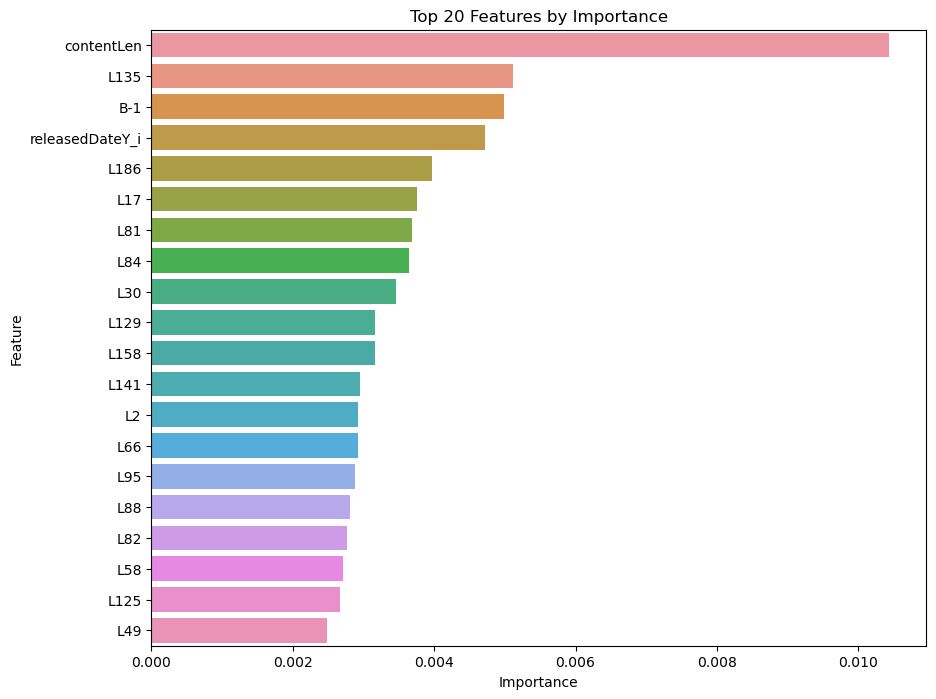

In [21]:
# Define the preprocessor for numeric scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['contentLen', 'releasedDateY_i'])
    ], remainder='passthrough')

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_df, papers_df['First_Gender'], test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Extract the feature names from the preprocessor and DictVectorizer
numeric_features = ['contentLen', 'releasedDateY_i']
taxo_features = taxo_vectorizer.get_feature_names_out()
lda_features = lda_vectorizer.get_feature_names_out()
bert_features = bert_vectorizer.get_feature_names_out()
all_features = numeric_features + list(taxo_features) + list(lda_features) + list(bert_features)

# Get feature importances from the Random Forest model
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# Ensure the lengths match
assert len(all_features) == len(feature_importances), "Feature names and importances length mismatch"

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top features by importance:")
print(feature_importance_df.head(20))

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Features by Importance')
plt.show()

In [22]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       female       0.68      0.48      0.56        83
         male       0.66      0.84      0.74       112
mostly_female       0.00      0.00      0.00         1
  mostly_male       0.00      0.00      0.00         6

     accuracy                           0.66       202
    macro avg       0.33      0.33      0.33       202
 weighted avg       0.64      0.66      0.64       202



C:\Users\maria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maria\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision measures how many of the items identified as a certain class are actually that class. For example, 68% of the instances labeled as "female" are actually female.

Recall measures how many of the actual instances of a class were identified correctly. For example, 84% of actual male instances were correctly identified.

F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

####  Out-of-Bag (OOB) Error

The OOB score is an internal validation score for Random Forests. It indicates how well the model generalizes to unseen data.
An OOB score of 0.5465 (54.65%) suggests moderate performance, indicating that the model has a reasonable but not outstanding ability to generalize.

In [23]:

# Get the OOB score
oob_score = rf.oob_score_
print(f"Out-of-Bag Score: {oob_score:.4f}")


Out-of-Bag Score: 0.5465


#### Confussion Matrix 

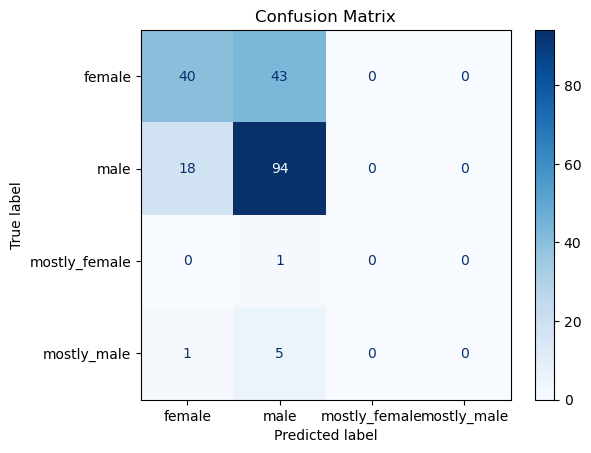

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


### Entropy meassures

Entropy is a measure of randomness or uncertainty in the dataset. A higher entropy value indicates more uncertainty.
The total entropy of 1.2626 indicates the level of unpredictability in the target variable (First_Gender) before any splits.

Range: 0-2 for 4 classes

In [25]:
# Helper functions for entropy and information gain calculation
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_value = np.sum([-counts[i]/np.sum(counts) * log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy_value

def info_gain(data, split_attribute, target_name):
    total_entropy = entropy(data[target_name])
    vals, counts = np.unique(data[split_attribute], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[split_attribute]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    information_gain = total_entropy - weighted_entropy
    return information_gain

# Calculate entropy of the dataset
total_entropy = entropy(papers_df['First_Gender'])
print(f"Total Entropy: {total_entropy:.4f}")


Total Entropy: 1.2626


### Gain meassurement
Information Gain measures the reduction in entropy or uncertainty after a dataset is split based on an attribute.
Higher information gain indicates that the attribute provides a significant reduction in uncertainty, making it a valuable feature for classification.

In [26]:
# Calculate information gain for each feature in taxo_df
for col in taxo_df.columns:
    papers_df[col] = taxo_df[col]
    gain = info_gain(papers_df, col, 'First_Gender')
    print(f"Information Gain for {col}: {gain:.4f}")

# Calculate information gain for each feature in lda_df
for col in lda_df.columns:
    papers_df[col] = lda_df[col]
    gain = info_gain(papers_df, col, 'First_Gender')
    print(f"Information Gain for {col}: {gain:.4f}")

# Calculate information gain for each feature in bert_df
for col in bert_df.columns:
    papers_df[col] = bert_df[col]
    gain = info_gain(papers_df, col, 'First_Gender')
    print(f"Information Gain for {col}: {gain:.4f}")

Information Gain for ('GBIF:1', 'Animalia'): -0.0571
Information Gain for ('GBIF:1000', 'Mecoptera'): -0.0600
Information Gain for ('GBIF:1000', 'scorpionfly'): -0.0639
Information Gain for ('GBIF:1000091', 'Methanobacterium'): -0.0639
Information Gain for ('GBIF:1000326', 'Methanococcoides'): -0.0639
Information Gain for ('GBIF:1000372', 'Methanogenium'): -0.0619
Information Gain for ('GBIF:1000410', 'Methanogenium frigidum'): -0.0639
Information Gain for ('GBIF:1000426', 'Hexarthra'): -0.0639
Information Gain for ('GBIF:1000447', 'Hexarthra mira'): -0.0639
Information Gain for ('GBIF:1000581', 'Rotifer'): -0.0646
Information Gain for ('GBIF:10008615', 'Nu Bonifácio & Menot, 2018'): -0.0659
Information Gain for ('GBIF:1001202', 'Habrotrocha angusticollis'): -0.0639
Information Gain for ('GBIF:1001916', 'Asplanchna'): -0.0639
Information Gain for ('GBIF:1001917', 'Asplanchna girodi'): -0.0639
Information Gain for ('GBIF:1002167', 'Lecane'): -0.0639
Information Gain for ('GBIF:10022704'

C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10212955', 'Vespa orientalis'): -0.0639
Information Gain for ('GBIF:10217076', 'Olinia'): -0.0639
Information Gain for ('GBIF:1022072', 'Sardosoma'): -0.0639
Information Gain for ('GBIF:1022816', 'Leschius mcallisteri'): -0.0639
Information Gain for ('GBIF:10229324', 'Pteronymia obscuratus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10229378', 'Tetrahymena thermophila'): -0.0547
Information Gain for ('GBIF:10229938', 'Mangea'): -0.0639
Information Gain for ('GBIF:10231195', 'Colpidium striatum'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1023474', 'Fagina silvatica'): -0.0639
Information Gain for ('GBIF:10237062', 'American Tree Sparrow'): -0.0639
Information Gain for ('GBIF:10237375', 'Brachyura'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10238569', 'Cecidomyiidae'): -0.0611
Information Gain for ('GBIF:10241599', 'Favia'): -0.0600
Information Gain for ('GBIF:10246346', '? mantelli'): -0.0659
Information Gain for ('GBIF:10260824', 'Neosiphonia harveyi'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1026477', 'Polyzonium germanicum'): -0.0659
Information Gain for ('GBIF:10266942', 'Tetrahymena elliotti'): -0.0639
Information Gain for ('GBIF:10278948', 'Leuctra'): -0.0639
Information Gain for ('GBIF:1028022', 'Glomeris marginata'): -0.0639
Information Gain for ('GBIF:1028151', 'Glomeris intermedia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10283053', 'Proceratium bruelheidei'): -0.0622
Information Gain for ('GBIF:10288693', 'Stenus yukawai'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10291408', 'Lenticulina antillica'): -0.0624
Information Gain for ('GBIF:10295347', 'Orobanche ramosa'): -0.0637
Information Gain for ('GBIF:1029644', 'Elpidium'): -0.0659
Information Gain for ('GBIF:10298534', 'Cinara cembrae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10313640', '? townsendii'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10313671', 'Coleoptera'): -0.0278
Information Gain for ('GBIF:1031524', 'Liposcelis paeta'): -0.0639
Information Gain for ('GBIF:1031774', 'Myopsocus'): -0.0639
Information Gain for ('GBIF:10324511', 'Arsenura arianae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10328329', 'Haenschia derama'): -0.0639
Information Gain for ('GBIF:10335412', 'Solarium'): -0.0637
Information Gain for ('GBIF:10336131', 'Stenus lac'): -0.0639
Information Gain for ('GBIF:1033661', 'Lara'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10340096', '? sera'): -0.0637
Information Gain for ('GBIF:1034699', 'tiger beetles'): -0.0626
Information Gain for ('GBIF:1034737', 'Alpine Tiger Beetle'): -0.0639
Information Gain for ('GBIF:1034845', 'Colorado Tiger Beetle'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10349039', 'Jalmenus evagoras'): -0.0639
Information Gain for ('GBIF:10349667', 'Digitalis purpurea'): -0.0626
Information Gain for ('GBIF:1035', 'Jahnulales'): -0.0637
Information Gain for ('GBIF:1035167', 'Amara lunicollis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1035194', 'Amara aulica'): -0.0637
Information Gain for ('GBIF:1035293', 'Brachinus'): -0.0639
Information Gain for ('GBIF:1035360', 'Perigona'): -0.0639
Information Gain for ('GBIF:1035366', 'Patrobus septentrionis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1035578', 'Nebria brevicollis'): -0.0637
Information Gain for ('GBIF:10356062', 'Lathyrus'): -0.0637
Information Gain for ('GBIF:10357105', 'Hyalenna sulmona'): -0.0639
Information Gain for ('GBIF:10358654', 'Elphidium selseyense'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1036216', 'Bembidion lampros'): -0.0637
Information Gain for ('GBIF:10366301', 'Oleria similigena'): -0.0639
Information Gain for ('GBIF:1036779', 'Carabus auratus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1036789', 'Carabus granulatus'): -0.0637
Information Gain for ('GBIF:10368215', 'Apanteles glomeratus'): -0.0639
Information Gain for ('GBIF:1036865', 'Evolenes'): -0.0637
Information Gain for ('GBIF:10368762', 'Genus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1036917', 'Anisodactylus binotatus'): -0.0637
Information Gain for ('GBIF:1037109', 'Gehringia'): -0.0639
Information Gain for ('GBIF:1037149', 'Omus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1037288', 'Trechus'): -0.0637
Information Gain for ('GBIF:10375696', '? lewinii Henn. ex Lewin'): -0.0639
Information Gain for ('GBIF:1037611', 'Licinus'): -0.0637
Information Gain for ('GBIF:10378082', '? limonensis'): -0.0639
Information Gain for ('GBIF:10379861', 'Samia vanschaycki'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1038', 'Chaetothyriales'): -0.0626
Information Gain for ('GBIF:10382323', 'Paramycetophylax bruchi'): -0.0639
Information Gain for ('GBIF:10388807', 'Stenus kazami'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1038971', 'American burying beetle'): -0.0626
Information Gain for ('GBIF:1038977', 'Nicrophorus orbicollis'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1039006', 'Nicrophorus vespilloides'): -0.0626
Information Gain for ('GBIF:10395009', 'Heteroptera'): -0.0498


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1039580', 'Devia'): -0.0659
Information Gain for ('GBIF:10396136', 'Pteronymia medellina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10399321', 'Myriophyllum verticillatum'): -0.0639
Information Gain for ('GBIF:104', 'Prasinophyta'): -0.0639
Information Gain for ('GBIF:1040', 'Eurotiales'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1040427', 'Stenus'): -0.0639
Information Gain for ('GBIF:10404365', 'Tiana'): -0.0639
Information Gain for ('GBIF:10407598', 'Ficus semicordata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10409409', 'Rotifera'): -0.0600
Information Gain for ('GBIF:10419499', '? simpsoni'): -0.0639
Information Gain for ('GBIF:1042624', 'Dacne picta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1042709', 'Danae'): -0.0476
Information Gain for ('GBIF:10429870', 'Sideroxylon spec (H.J.Lam & B.Meeuse) Smedmark & Anderb.'): -0.0639
Information Gain for ('GBIF:1043082', 'Hippodamia variegata'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1043097', 'Adalia bipunctata'): -0.0624
Information Gain for ('GBIF:1043097', 'Adalia bipunctata (Linnaeus, 1758)'): -0.0639
Information Gain for ('GBIF:1043097', 'two-spotted ladybug'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1043111', 'Harmonia'): -0.0639
Information Gain for ('GBIF:1043171', 'Calvia quatuordecimguttata'): -0.0639
Information Gain for ('GBIF:10436521', '? pauper'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1043655', 'Thalassa'): -0.0626
Information Gain for ('GBIF:10442247', 'Myzus persicae'): -0.0556


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10452367', 'Anisoptera'): -0.0626
Information Gain for ('GBIF:10452645', 'Aureliana'): -0.0489
Information Gain for ('GBIF:10457483', '? bohemica'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1045823', 'Tribolium'): -0.0639
Information Gain for ('GBIF:1045843', 'Tenebrio molitor'): -0.0599


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1045843', 'yellow mealworm'): -0.0639
Information Gain for ('GBIF:1045875', 'Alphitobius diaperinus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1045875', 'lesser mealworm'): -0.0626
Information Gain for ('GBIF:10458950', '? depredator'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1045999', 'Mordella'): -0.0637
Information Gain for ('GBIF:10462830', 'Melaleuca'): -0.0639
Information Gain for ('GBIF:1046361', 'Epicauta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10465059', 'Episcada hymenaea'): -0.0639
Information Gain for ('GBIF:10465436', 'Elymus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10469905', 'Lacerta vivipara'): -0.0577
Information Gain for ('GBIF:1047', 'Pleosporales'): -0.0637
Information Gain for ('GBIF:1047208', 'Aderus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1047343', 'Callosobruchus maculatus'): -0.0592
Information Gain for ('GBIF:1047370', 'Labidomera clivicollis'): -0.0639
Information Gain for ('GBIF:1047449', 'Xanthogaleruca luteola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1047525', 'Acanthoscelides obtectus'): -0.0664
Information Gain for ('GBIF:1047536', 'Leptinotarsa decemlineata'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10476453', '? projecta'): -0.0639
Information Gain for ('GBIF:1048319', 'Oulema melanopus'): -0.0637
Information Gain for ('GBIF:1048466', 'Psylliodes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1048471', 'Psylliodes chrysocephalus'): -0.0639
Information Gain for ('GBIF:1048762', 'Chrysomela'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1048809', 'Lilioceris lilii'): -0.0659
Information Gain for ('GBIF:1048933', 'Pyrrhalta viburni'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10490956', 'Phalacrocorax carbo sinensis'): -0.0618
Information Gain for ('GBIF:1049249', 'Phyllotreta cruciferae'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10494302', 'Sistotrema'): -0.0639
Information Gain for ('GBIF:1049653', 'Dermolepida albohirtum'): -0.0639
Information Gain for ('GBIF:10497410', 'Limnephilid'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:105', 'Porifera'): -0.0585
Information Gain for ('GBIF:10500175', 'Ammophila arenaria'): -0.0639
Information Gain for ('GBIF:1050040', 'Acarina'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10501510', 'Apidae'): -0.0476
Information Gain for ('GBIF:10507373', 'Common Whitethroat'): -0.0639
Information Gain for ('GBIF:10512561', '? gravis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10514845', 'Genus'): -0.0626
Information Gain for ('GBIF:1051702', 'Dejeania'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1052', 'Helotiales'): -0.0624
Information Gain for ('GBIF:10520649', 'Ficus religiosa'): -0.0626
Information Gain for ('GBIF:10521199', 'Episcada trapezula'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10524280', 'Plectronia'): -0.0639
Information Gain for ('GBIF:10525490', '? spec'): -0.0639
Information Gain for ('GBIF:10525882', '? macdonaldi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10530239', 'Oxytenis nubila'): -0.0639
Information Gain for ('GBIF:10540993', 'Plasmodium falciparum'): -0.0646
Information Gain for ('GBIF:10543480', 'Odoribacteraceae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10546696', 'Cinara laricicola'): -0.0639
Information Gain for ('GBIF:10548994', 'Pterostichus nigrita'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10549423', 'Chaetoceros gelidus'): -0.0639
Information Gain for ('GBIF:10565901', 'Corallium'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10565944', 'Haliclona'): -0.0639
Information Gain for ('GBIF:10567537', 'Amphora coffeiformis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10568713', 'Glomeris marginata'): -0.0639
Information Gain for ('GBIF:10570429', '? separata'): -0.0659
Information Gain for ('GBIF:10571112', 'Hyalenna buckleyi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10572839', 'Limnomermis macronuclei'): -0.0639
Information Gain for ('GBIF:10572889', 'Lycaena hippothoe'): -0.0639
Information Gain for ('GBIF:10577545', '? limonensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1058', 'Boliniales'): -0.0637
Information Gain for ('GBIF:10582174', 'Euceraphis betulae'): -0.0639
Information Gain for ('GBIF:10583186', 'Thermomyces lanuginosus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1058687', 'Prodontria lewisi'): -0.0659
Information Gain for ('GBIF:10587776', 'Viola tricolor curtisii'): -0.0637
Information Gain for ('GBIF:1059', 'Microascales'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10592508', 'Schistosoma japonicum'): -0.0646
Information Gain for ('GBIF:10592935', 'Astarte borealis'): -0.0639
Information Gain for ('GBIF:10594772', 'In'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10599943', 'Haenschia sidonia'): -0.0639
Information Gain for ('GBIF:106', 'Rhodophyta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:106', 'red algae'): -0.0611
Information Gain for ('GBIF:10601986', 'Dicranopteris'): -0.0639
Information Gain for ('GBIF:10603443', 'Branchiopoda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10604523', 'Alcyonium'): -0.0639
Information Gain for ('GBIF:1060757', 'Trematodes'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10607859', 'Cinara tujafilina'): -0.0639
Information Gain for ('GBIF:10609038', 'Gabrius gabrieli'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1061', 'Sordariales'): -0.0637
Information Gain for ('GBIF:10612030', 'Salmonchus oncorhynchi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10613755', '? commune'): -0.0626
Information Gain for ('GBIF:10618033', '? simpsoni'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10618166', 'Barona Calisto, Piñeiro & Piñeiro Martínez, 2019'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10622978', 'Orchesella cincta'): -0.0646
Information Gain for ('GBIF:10626309', 'Ixodes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10629993', 'White Ibises'): -0.0639
Information Gain for ('GBIF:10632589', 'Odontotermes morphospecies'): -0.0654


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1063370', 'Gouna'): -0.0637
Information Gain for ('GBIF:10637578', 'Aulostomus chinensis'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10637619', '? limnetica'): -0.0626
Information Gain for ('GBIF:1064', 'Geastrales'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1064561', 'Anahi Martínez, 1958'): -0.0639
Information Gain for ('GBIF:10658374', 'Astenus mauretanicus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:10663676', 'Pterostichus cupreus'): -0.0639
Information Gain for ('GBIF:10663797', 'Carabus auratus'): -0.0637
Information Gain for ('GBIF:10663961', 'Harpalus latus'): -0.0637
Information Gain for ('GBIF:10665771', 'Liolaemus lineomaculatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10666185', 'Elaphe obsoleta obsoleta'): -0.0639
Information Gain for ('GBIF:10666996', 'Dipsacus fullonum'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10666996', 'Dipsacus fullonum L.'): -0.0639
Information Gain for ('GBIF:10666996', 'common teasel'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10666996', 'teasel'): -0.0639
Information Gain for ('GBIF:10667121', 'Solanum tuberosum'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10667136', 'Solanum nigrum'): -0.0658
Information Gain for ('GBIF:10667280', 'Centaurea nigra'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10667422', 'saltmarsh aster'): -0.0639
Information Gain for ('GBIF:10667771', 'Melampyrum sylvaticum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10667949', 'Aristolochia rotunda'): -0.0639
Information Gain for ('GBIF:10668068', 'Salix cinerea'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10668288', 'Citrus sinensis'): -0.0639
Information Gain for ('GBIF:10668853', 'Aster sibiricus sibiricus'): -0.0462


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10669831', 'Anura'): -0.0506
Information Gain for ('GBIF:10669882', 'Le'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10669907', 'Lepturus'): -0.0639
Information Gain for ('GBIF:10669908', 'Lepturus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:10669911', 'Sitella'): -0.0639
Information Gain for ('GBIF:10669928', 'Caprina'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1067', 'mullets'): -0.0639
Information Gain for ('GBIF:1069066', 'Mothon'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1072588', 'Scarabaeinus'): -0.0639
Information Gain for ('GBIF:1074357', 'Enema'): -0.0639

C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]



Information Gain for ('GBIF:1076499', 'Euphoria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1078391', 'Heterosoma'): -0.0639
Information Gain for ('GBIF:1079', 'Phyllodocida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:108', 'Platyhelminthes'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:108', 'platyhelminths'): -0.0646
Information Gain for ('GBIF:108', 'tapeworms'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1082021', 'Ranzania'): -0.0639
Information Gain for ('GBIF:1083263', 'Ghania'): -0.0462


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1090772', 'Onthophagus acuminatus'): -0.0633
Information Gain for ('GBIF:1097383', 'Samia'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1097723', 'Priscilla'): -0.0639
Information Gain for ('GBIF:110', 'brachiopods'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1101476', 'Harringtonia'): -0.0639
Information Gain for ('GBIF:1103', 'sturgeons'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1104', 'Albuliformes'): -0.0639
Information Gain for ('GBIF:1105029', 'Jamesia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1108', 'Anseriformes'): -0.0652
Information Gain for ('GBIF:1108', 'Ducks'): -0.0476


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1108', 'Geese'): -0.0600
Information Gain for ('GBIF:1108', 'Swans'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1108', 'Waterfowl'): -0.0639
Information Gain for ('GBIF:1108', 'waterfowl'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1109', 'Mesostigmata'): -0.0606


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1109', 'mites'): -0.0576
Information Gain for ('GBIF:1109504', 'Agapanthia cardui'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1109514', 'Agapanthia pannonica'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:111', 'Proteobacteria'): -0.0580
Information Gain for ('GBIF:1112141', 'Domitia'): -0.0533


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1115815', 'Phrynosoma'): -0.0639
Information Gain for ('GBIF:1118393', 'Siela'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1119784', 'Monochamus'): -0.0639
Information Gain for ('GBIF:1119833', 'Pseudomyrmecion'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1123236', 'Tetrops starki Sánchez Sobrino & Tolosa Sánchez, 2003'): -0.0397
Information Gain for ('GBIF:1123237', 'Tetrops starki Sánchez Sobrino & Tolosa Sánchez, 2003'): -0.0397


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1125674', 'Docus'): -0.0639
Information Gain for ('GBIF:1127011', 'Souvanna'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1130', 'Microbotryales'): -0.0639
Information Gain for ('GBIF:1131344', 'Colobus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1132993', 'Compsa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1134880', 'Piola'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1137558', 'Beta'): -0.0530
Information Gain for ('GBIF:1140580', 'Catuaba'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1149510', 'Stenurella melanura'): -0.0639
Information Gain for ('GBIF:1153', 'Cypriniformes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1153', 'minnows'): -0.0659
Information Gain for ('GBIF:1154599', 'Niraeus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1154931', 'Tragosoma depsarium'): -0.0639
Information Gain for ('GBIF:1156004', 'Monochamus galloprovincialis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1158374', 'Prionoplus reticularis White, 1843'): -0.0639
Information Gain for ('GBIF:116', 'Lobosa'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1160675', 'Methia'): -0.0639
Information Gain for ('GBIF:1161', 'Pseudoscorpiones'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1161', 'Pseudoscorpionida'): -0.0613
Information Gain for ('GBIF:1161', 'pseudoscorpions'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1161912', 'Elodes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1161923', 'Ora'): -0.0599
Information Gain for ('GBIF:1161928', 'Scirtes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1162', 'Elopiformes'): -0.0605
Information Gain for ('GBIF:1162441', 'Dictyoptera'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1164311', 'Byctiscus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1164351', 'Byctiscus betulae'): -0.0639
Information Gain for ('GBIF:1167006', 'Bruchela'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1167806', 'Autotropis'): -0.0626
Information Gain for ('GBIF:1169988', 'Cosmopolites sordidus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1170511', 'Anius'): -0.0646
Information Gain for ('GBIF:1171812', 'Car'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1172', 'Liliales'): -0.0639
Information Gain for ('GBIF:1175', 'Microsporida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1175888', 'Dietzia'): -0.0639
Information Gain for ('GBIF:1176652', 'Spoliata'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1179544', 'Cnemidophorus'): -0.0639
Information Gain for ('GBIF:1180', 'Dictyotales'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1181282', 'Sitona lineatus'): -0.0639
Information Gain for ('GBIF:1187', 'Archaeognatha'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1196892', 'Amitrus'): -0.0637
Information Gain for ('GBIF:1197779', 'Ceuthorrhynchus napi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:12', 'Lycopodiophyta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1202322', 'Agestra'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1202943', 'Empira'): -0.0639
Information Gain for ('GBIF:1204404', 'Hyphaene guineensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1205931', 'Danae'): -0.0476
Information Gain for ('GBIF:121', 'Elasmobranchii'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:121', 'elasmobranch'): -0.0585


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1211257', 'Tomicus piniperda'): -0.0624
Information Gain for ('GBIF:1216917', 'Xylosandrus compactus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1221', 'Rhizobiales'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1224', 'Dermaptera'): -0.0586
Information Gain for ('GBIF:1224', 'earwig'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1224120', 'Lixus punctiventris'): -0.0637
Information Gain for ('GBIF:1224120', 'Lixus punctiventris Boheman, 1835'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1225', 'Ephemeroptera'): -0.0521
Information Gain for ('GBIF:1225', 'mayflies'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1226221', 'Hypothenemus hampei'): -0.0626
Information Gain for ('GBIF:1227', 'parasitic insects'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1228', 'Thysanoptera'): -0.0573
Information Gain for ('GBIF:1228', 'thrips'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1228026', 'Dendroctonus ponderosae'): -0.0626
Information Gain for ('GBIF:1228026', 'mountain pine beetle'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1228034', 'Dendroctonus frontalis Zimmermann, 1868'): -0.0639
Information Gain for ('GBIF:1228053', 'spruce beetle'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1228061', 'Dendroctonus micans'): -0.0639
Information Gain for ('GBIF:1228061', 'european spruce beetle'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1229', 'Zoraptera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1231', 'Amphipoda'): -0.0481


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1231', 'amphipod'): -0.0586
Information Gain for ('GBIF:1231', 'amphipods'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1237428', 'Pityogenes chalcographus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1237475', 'Ceutorhynchus'): -0.0639
Information Gain for ('GBIF:1237532', 'Ceutorhynchus napi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1237542', 'Ceutorhynchus assimilis'): -0.0639
Information Gain for ('GBIF:1238243', 'Amalthus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1238953', 'Laparocerus'): -0.0639
Information Gain for ('GBIF:1239', 'Haplosclerida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1242', 'Corallimorpharia'): -0.0639
Information Gain for ('GBIF:1244656', 'Trypodendron lineatum'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1245228', 'Phyllobius'): -0.0639
Information Gain for ('GBIF:1247492', 'Notiophilus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1248775', 'Neurotoma'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1249729', 'European pine sawfly'): -0.0639
Information Gain for ('GBIF:1249729', 'Neodiprion sertifer'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1250427', 'Toka'): -0.0639
Information Gain for ('GBIF:1250606', 'Perilitus brevicollis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1251', 'Geophilomorpha'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1251594', 'Dacnusa maculipes'): -0.0637
Information Gain for ('GBIF:1252663', 'Blacus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1254595', 'Adelius cadmium'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1255678', 'Asobara tabida'): -0.0598


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1257602', 'Cotesia'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1257656', 'Cotesia glomerata'): -0.0600
Information Gain for ('GBIF:1257783', 'Cotesia marginiventris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1257857', 'Cotesia rubecula'): -0.0613
Information Gain for ('GBIF:1257912', 'Cotesia congregata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1257941', 'Cotesia vestalis'): -0.0626
Information Gain for ('GBIF:1257942', 'Cotesia plutellae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1258445', 'Dendrosoter middendorffii'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1260239', 'Diaeretiella rapae'): -0.0598
Information Gain for ('GBIF:1260239', 'Diaeretiella rapae (McIntosh, 1855)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1260918', 'Lysiphlebus testaceipes'): -0.0639
Information Gain for ('GBIF:1260939', 'Lysiphlebus hirticornis Mackauer, 1960'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1260952', 'Lysiphlebus cardui'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1262', 'Capnodiales'): -0.0626
Information Gain for ('GBIF:1262008', 'Simra'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1262034', 'Bracon'): -0.0624
Information Gain for ('GBIF:1262184', 'Bracon dobrovolskii'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1263318', 'Diachasmimorpha kraussii'): -0.0639
Information Gain for ('GBIF:1263372', 'Diachasmimorpha longicaudata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1263391', 'Ephedrus'): -0.0637
Information Gain for ('GBIF:1263447', 'Ephedrus plagiator'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1263651', 'Praon volucre'): -0.0622
Information Gain for ('GBIF:1263660', 'Praon hyperomyzus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1263796', 'Microplitis'): -0.0637
Information Gain for ('GBIF:1264121', 'Caenopachys'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1264123', 'Caenopachys hartigii'): -0.0659
Information Gain for ('GBIF:1264123', 'Caenopachys hartigii (Ratzeburg, 1848)'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1264316', 'Fopius arisanus'): -0.0639
Information Gain for ('GBIF:1266366', 'Meteorus pulchricornis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1266366', 'Meteorus pulchricornis (Wesmael, 1835)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1266916', 'Opius oophilus (Fullaway, 1951)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1268925', 'Biosteres'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1269075', 'Aphidius'): -0.0624
Information Gain for ('GBIF:1269076', 'Aphidius sonchi'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1269085', 'Aphidius ervi'): -0.0537
Information Gain for ('GBIF:1269085', 'Aphidius ervi Haliday, 1834'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1269151', 'Aphidius matricariae'): -0.0624
Information Gain for ('GBIF:1269151', 'Aphidius matricariae Haliday, 1834'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1269181', 'Aphidius avenae'): -0.0637
Information Gain for ('GBIF:1269188', 'Aphidius rhopalosiphi'): -0.0637
Information Gain for ('GBIF:1269194', 'Aphidius smithi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1269231', 'Aphidius eadyi'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1269247', 'Aphidius colemani'): -0.0631
Information Gain for ('GBIF:1269247', 'Aphidius colemani Viereck, 1912'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1269249', 'Aphidius transcaspicus'): -0.0639
Information Gain for ('GBIF:1269582', 'Lipolexis gracilis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1269675', 'Opius'): -0.0637
Information Gain for ('GBIF:1272218', 'Cosmophorus regius'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1276760', 'Rhimphoctona'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1277', 'Erysiphales'): -0.0637
Information Gain for ('GBIF:1277809', 'Reclinervellus nielseni'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1280674', 'Shortia'): -0.0639
Information Gain for ('GBIF:1281', 'Saccharomycetales'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1287404', 'Enclisis vindex'): -0.0659
Information Gain for ('GBIF:1288311', 'Campoletis chlorideae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1290', 'Hypocreales'): -0.0639
Information Gain for ('GBIF:1290088', 'Gelis iglesiasi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1290150', 'Gelis agilis'): -0.0639
Information Gain for ('GBIF:1290837', 'Diadegma erucator'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1291044', 'Diadegma insulare'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1291101', 'Diadegma semiclausum'): -0.0611
Information Gain for ('GBIF:1291545', 'Hyposoter ebeninus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1291627', 'Hyposoter didymator'): -0.0639
Information Gain for ('GBIF:1292', 'Ophiostomatales'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1295227', 'Phradis'): -0.0659
Information Gain for ('GBIF:1296516', 'Phrudus monilicornis'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:13', 'hornworts'): -0.0639
Information Gain for ('GBIF:1300', 'Cantharellales'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1301720', 'Lysibia nana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1302289', 'Camera'): -0.0639
Information Gain for ('GBIF:1303', 'Gomphales'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1303133', 'Trieces'): -0.0639
Information Gain for ('GBIF:1308885', 'Dendrocerus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1308973', 'Dendrocerus carpenteri (Curtis, 1829)'): -0.0637
Information Gain for ('GBIF:1309405', 'Aphanogmus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1309605', 'Andricus caputmedusae'): -0.0639
Information Gain for ('GBIF:1309629', 'Callirhytis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1309671', 'Cynips divisa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1309708', 'Leptopilina heterotoma'): -0.0626
Information Gain for ('GBIF:1309708', 'Leptopilina heterotoma (Thomson, 1862)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1309939', 'Mischocyttarus pirassununga'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:131', 'Amphibia'): -0.0661
Information Gain for ('GBIF:131', 'Amphibians'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:131', 'amphibians'): -0.0552


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1310145', 'Agelaia pallipes'): -0.0639
Information Gain for ('GBIF:1310154', 'Agelaia cajennensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1310500', 'Polistes'): -0.0606
Information Gain for ('GBIF:1310622', 'Polistes gallicus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1310772', 'Polistes jadwigae Dalla Torre, 1904'): -0.0639
Information Gain for ('GBIF:1310776', 'Polistes jadwigae Dalla Torre, 1904'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1310818', 'Polistes humilis'): -0.0639
Information Gain for ('GBIF:1310897', 'Polistes chinensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1311334', 'Vespa'): -0.0639
Information Gain for ('GBIF:1311433', 'Vespa orientalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Information Gain for ('GBIF:1311477', 'Vespa velutina'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1311477', 'Vespa velutina Lepeletier, 1836'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1311527', 'Vespa crabro'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1311527', 'hornet'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1311631', 'Vespula'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1311649', 'Vespula germanica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1311671', 'Vespula vulgaris'): -0.0646
Information Gain for ('GBIF:1311704', 'Epipona'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1311737', 'Angiopolybia pallens'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1311872', 'Protopolybia exigua'): -0.0639
Information Gain for ('GBIF:1312194', 'Masarina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1312205', 'Cerceris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1312361', 'Camponotus'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1312773', 'Camponotus herculeanus'): -0.0639
Information Gain for ('GBIF:1313', 'salmons'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1314848', 'Formica podzolica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1315043', 'Formica pallidefulva'): -0.0639
Information Gain for ('GBIF:1315132', 'Formica rufa'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1315169', 'Formica polyctena'): -0.0639
Information Gain for ('GBIF:1315215', 'Myrmecina graminicola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1315321', 'Discothyrea'): -0.0639
Information Gain for ('GBIF:1315391', 'Wasmannia auropunctata'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1315403', 'Solenopsis'): -0.0613
Information Gain for ('GBIF:1315738', 'Pristomyrmex punctatus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1315771', 'Pristomyrmex pungens'): -0.0659
Information Gain for ('GBIF:1315806', 'Cyphomyrmex'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1315820', 'Cyphomyrmex rimosus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1315863', 'Aphaenogaster'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1316108', 'Aphomomyrmex afer'): -0.0639
Information Gain for ('GBIF:1316163', 'Philidris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1316177', 'Philidris nagasau'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1316257', 'Allomerus octoarticulatus'): -0.0639
Information Gain for ('GBIF:1316261', 'Allomerus decemarticulatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1316504', 'Messor sanctus'): -0.0639
Information Gain for ('GBIF:1316616', 'Sericomyrmex'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1316623', 'Sericomyrmex amabilis'): -0.0639
Information Gain for ('GBIF:1316700', 'Megalomyrmex'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1316714', 'Megalomyrmex symmetochus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1316733', 'Megalomyrmex silvestrii'): -0.0639
Information Gain for ('GBIF:1316904', 'Linepithema'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1316908', 'Argentine ant'): -0.0639
Information Gain for ('GBIF:1316908', 'Linepithema humile'): -0.0654


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1316911', 'Argentine ant'): -0.0639
Information Gain for ('GBIF:1316948', 'Apterostigma'): -0.0639

C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]



Information Gain for ('GBIF:1316950', 'Apterostigma megacephala'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1316950', 'Apterostigma megacephala Lattke, 1999'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1316970', 'Apterostigma pilosum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1317499', 'Aenictus'): -0.0626
Information Gain for ('GBIF:1317800', 'Dorylus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1318775', 'Myrmica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1318776', 'Myrmica sabuleti'): -0.0639
Information Gain for ('GBIF:1318874', 'Myrmica rubra'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1319124', 'Atopomyrmex calpocalycola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1319181', 'Tetraponera'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1319286', 'Tetraponera tessmanni'): -0.0626
Information Gain for ('GBIF:1319312', 'Tetraponera aethiops'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1319369', 'Liometopum apiculatum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1319505', 'Anochetus emarginatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1319697', 'Pachycondyla goeldii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1319824', 'Pachycondyla villosa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1319873', 'Pachycondyla apicalis'): -0.0639
Information Gain for ('GBIF:1320034', 'Petalomyrmex phylax'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1320154', 'Myrmicocrypta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1320500', 'Mycetophylax'): -0.0639
Information Gain for ('GBIF:1320640', 'Acromyrmex'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1320679', 'Acromyrmex lundii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1320686', 'Acromyrmex octospinosus'): -0.0639
Information Gain for ('GBIF:1320701', 'Acromyrmex heyeri'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1320702', 'Acromyrmex landolti'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1320861', 'Octostruma balzani'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1321483', 'Euprenolepis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1321484', 'Euprenolepis procera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1321599', 'Rhytidoponera metallica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1321654', 'Pheidole'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1322399', 'Pheidole minutula'): -0.0639
Information Gain for ('GBIF:1322635', 'Pheidole megacephala'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1322845', 'Azteca'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1323108', 'Atta'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1323128', 'Tetramorium'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1323558', 'Tetramorium aculeatum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1323588', 'Prenolepis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1324306', 'Crematogaster'): -0.0573


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1324575', 'Crematogaster gabonensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1324677', 'Crematogaster brasiliensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1324689', 'Crematogaster rogenhoferi Mayr, 1879'): -0.0639
Information Gain for ('GBIF:1324743', 'Crematogaster margaritae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1324857', 'Crematogaster stadelmanni'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1325098', 'Crematogaster clariventris'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1325180', 'Crematogaster chiarinii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1325394', 'Pogonomyrmex badius'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1325751', 'Lasius'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1325751', 'Lasois'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1325868', 'Cephalotes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1326011', 'Iridomyrmex'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1326093', 'Iridomyrmex purpureus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1326115', 'Cerapachys'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1326152', 'Cerapachys biroi'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1326422', 'Trachymyrmex'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1326475', 'Trachymyrmex septentrionalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1326487', 'Cladomyrma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1326573', 'Gnamptogenys hartmani'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1326614', 'Hypoponera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1327024', 'Pseudomyrmex tenuis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1327045', 'Pseudomyrmex concolor'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1327171', 'Heteroponera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1327395', 'Amblyopone amblyops'): -0.0639
Information Gain for ('GBIF:1330315', 'Delta'): -0.0622


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1330439', 'Giordania'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334161', 'Phaenoglyphis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334163', 'Alloxysta'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334476', 'Chelostoma'): -0.0652


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334493', 'Chelostoma rapunculi'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334499', 'Chelostoma campanularum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334527', 'Chelostoma florisomne'): -0.0622


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334527', 'Chelostoma florisomne (Linnaeus, 1758)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334618', 'Rhodanthidium'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334635', 'Rhodanthidium sticticum'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334757', 'Apis'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334757', 'honey bee'): -0.0518


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334798', 'Anthidium'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1334798', 'mason bee'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1335011', 'Megachile'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1335213', 'Megachile sculpturalis'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1335213', 'Megachile sculpturalis Smith, 1853'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1335648', 'Megachile rotundata'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1336315', 'Leafcutting bee'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1336452', 'Megachile lagopoda'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1336587', 'Lithurgus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1337092', 'Hoplitis adunca'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1337506', 'Anthophora'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1337664', 'Osmia'): -0.0550


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1339721', 'Partamona helleri'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340042', 'Melipona'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340278', 'Bombus'): -0.0533


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340278', 'bumble bees'): -0.0609


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340278', 'bumblebees'): -0.0544


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340286', 'Bombus muscorum'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340290', 'Bombus lapponicus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340298', 'Bombus lucorum'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340301', 'Bombus lapidarius'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340305', 'Bombus pratorum'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340308', 'Bombus jonellus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340325', 'Bombus alpinus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340333', 'Bombus sylvestris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340342', 'Bombus sylvarum'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340350', 'Bombus impatiens'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340358', 'Bombus wurflenii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340361', 'Bombus hyperboreus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340362', 'Bombus bohemicus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340365', 'Bombus haematurus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340382', 'Bombus bimaculatus Cresson, 1863'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340394', 'Bombus ruderarius'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340403', 'Bombus balteatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340405', 'Bombus pascuorum'): -0.0593


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340418', 'Bombus vestalis'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340422', 'Bombus subterraneus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340444', 'Bombus soroeensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340465', 'Bombus consobrinus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340484', 'Bombus flavidus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340493', 'Bombus terricola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340503', 'Bombus terrestris'): -0.0556


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340503', 'Bombus terrestris (Linnaeus, 1758)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340506', 'Bombus norvegicus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340509', 'Bombus cingulatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340513', 'Bombus hypnorum'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340521', 'Bombus distinguendus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340523', 'Bombus humilis'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340542', 'Bombus hortorum'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1340870', 'Eucera'): -0.0606


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1341128', 'Diadasia rinconis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1341128', 'Diadasia rinconis Cockerell, 1897'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1341198', 'Ceratina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1341976', 'Apis mellifera'): -0.0453


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1341976', 'Apis mellifera Linnaeus, 1758'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1341976', 'honey bee'): -0.0518


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1341976', 'western honey bee'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1341979', 'Apis cerana'): -0.0558


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1342048', 'Xylocopa'): -0.0609


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1342048', 'carpenter bees'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1342108', 'Xylocopa violacea'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1342324', 'Xylocopa virginica'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1342324', 'Xylocopa virginica (Linnaeus, 1771)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1342408', 'Xylocopa capitata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1342745', 'Mourella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1343202', 'Lisotrigona'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1343230', 'Nomada'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1344087', 'Anthophora plumipes'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1344362', 'Anthophora quadrimaculata'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1344758', 'Nannotrigona perilampoides'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1345418', 'Psithyrus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1345710', 'Andrena'): -0.0598


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1346026', 'Argogorytes carbonarius'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1347978', 'Halictus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1348504', 'Colletes'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1348691', 'Colletes cunicularius'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1348742', 'Colletes floralis'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1348821', 'Colletes inaequalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1348905', 'Colletes nigricans'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1349359', 'Diphaglossa gayi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1349360', 'Hylaeus'): -0.0609


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1349795', 'Hylaeus communis'): -0.0609


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1350327', 'Prosopis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1350330', 'Crawfordapis crawfordi'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1351', 'Apiales'): -0.0483


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1351262', 'Sphecodes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1352488', 'Dialictus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1353', 'Ericales'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1353300', 'Halictus smaragdulus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1353310', 'Halictus simplex'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1353395', 'Halictus scabiosae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1353501', 'Lasioglossum'): -0.0558


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1353981', 'Lasioglossum subhirtum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1354102', 'Lasioglossum laticeps'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1354206', 'Lasioglossum morio'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1354263', 'Lasioglossum pauxillum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1354476', 'Lasioglossum calceatum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1354589', 'Lasioglossum quebecense'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1355016', 'Lasioglossum coriaceum (Smith, 1853)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1355018', 'Lasioglossum marginatum'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1355085', 'Lasioglossum malachurum'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1355872', 'Panurginus albopilosus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1356913', 'Andrena tenuistriata'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1357156', 'Andrena flavipes Panzer, 1799'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1357156', 'mining bee'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1357215', 'Andrena coitana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1357486', 'Andrena vaga'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1357486', 'Andrena vaga Panzer, 1799'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1357599', 'Andrena mali'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1357605', 'Andrena carolina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1357633', 'mining bee'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1357872', 'Andrena dorsata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358013', 'Andrena bisalicis Viereck, 1908'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358492', 'Apocrypta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358492', 'Apocrypta Coquerel, 1855'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358510', 'Apocrypta guineensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358519', 'Apocrypta robusta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358522', 'Apocrypta bakeri'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358543', 'Sycophila'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358620', 'Watshamiella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358653', 'Philotrypesis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358699', 'Philotrypesis pilosa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358707', 'Philotrypesis africana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358756', 'Decatoma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358812', 'Apocryptophagus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358902', 'Idarnes incerta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358939', 'Epichrysomalla'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358944', 'Lachaisea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358966', 'Chalcid'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358969', 'Comptoniella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1358971', 'Sycoryctes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359057', 'Blastophaga psenes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359108', 'Ceratosolen'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359110', 'Anidarnes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359178', 'Ceratosolen megacephalus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359190', 'Ceratosolen silvestrianus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359259', 'Odontofroggatia galili'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359319', 'Philosycus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359323', 'Philosycus monstruosus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359352', 'Aepocerus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359399', 'Agaon'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359403', 'Agaon cicatriferens'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359403', 'Agaon cicatriferens Wiebes, 1989'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359417', 'Tetrapus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359425', 'Sycomacophila carolae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359448', 'Otitesella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359532', 'Blastophaga'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359534', 'Courtella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359556', 'Courtella hamifera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359565', 'Pegoscapus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359575', 'Pegoscapus tonduzi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359590', 'Pegoscapus hoffmeyeri'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359603', 'Pegoscapus gemellus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359682', 'Sycophaga'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1359747', 'Destefania'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:136', 'Cephalopoda'): -0.0545


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:136', 'cephalopods'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:136', 'squids'): -0.0569


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1363514', 'Leucopis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1364062', 'Aphelinus mali'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1365255', 'Encarsia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1365418', 'Encarsia formosa'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1365769', 'Eretmocerus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1365799', 'Eretmocerus mundus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1366', 'Siphonaptera'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1366157', 'Ormyrus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1368148', 'Narayana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1368390', 'Anagrus epos Girault, 1911'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1368398', 'Anagrus breviphragma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1368625', 'Kikiki'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1369', 'Poales'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:137', 'Bivalvia'): -0.0559


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:137', 'clam'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:137', 'clams'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1370', 'Fabales'): -0.0644


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1370616', 'Miscogaster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1372669', 'Physothorax'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1372890', 'Torymus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1373', 'Stomatopoda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1374014', 'Ooencyrtus pityocampae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1378894', 'Raffaellia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1380213', 'Anagyrus kamali'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1380742', 'Thymus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1380926', 'Achrysocharoides zwoelferi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1381', 'Nitrosomonadales'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1383531', 'Necremnus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1383532', 'Necremnus croton'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1383562', 'Necremnus leucarthros'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1384396', 'Trichogramma'): -0.0605


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1384396', 'Trichogramma Westwood, 1833'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1384909', 'Chrysocharis oscinidis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1386359', 'Baryscapus servadeii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1389208', 'Entedon'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1389817', 'Pentacladia elegans elegans'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:139', 'Phylactolaemata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:139', 'freshwater bryozoans'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1390396', 'Eupelmus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1391010', 'Pachyneuron'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1391078', 'Holcaeus compressus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1392561', 'Heydenia Förster'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1393215', 'Dinotiscus eupterus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1393941', 'Nasonia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1396422', 'Roptrocerus mirus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1396907', 'Cea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1397337', 'Asaphes'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398338', 'Trichogrammatoidea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398349', 'Trichogrammatoidea bactrae'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398349', 'Trichogrammatoidea bactrae Nagaraja, 1979'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398717', 'Trichogramma cacoeciae'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398747', 'Trichogramma exiguum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398751', 'Trichogramma semblidis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398762', 'Trichogramma dendrolimi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398771', 'Trichogramma evanescens'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398788', 'Trichogramma principium'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398803', 'Trichogramma embryophagum'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398814', 'Trichogramma chilonis'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398826', 'Trichogramma pretiosum'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398844', 'Trichogramma euproctidis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398850', 'Trichogramma bourarachae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398865', 'Trichogramma voegelei'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398894', 'Trichogramma brassicae'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1398904', 'Trichogramma nubilale'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:14', 'Tardigrada'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1401', 'Gracilariales'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1401314', 'Telenomus podisi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1402784', 'Trissolcus basalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1403', 'Palmariales'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1403593', 'Haania'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1404683', 'Gryllus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1405121', 'Orthodera novaezealandiae Colenso, 1882'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1406179', 'Yersinia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1407107', 'Ephemera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1407459', 'Farrodes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1407473', 'Ephemerella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1408324', 'Caudatella'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1408626', 'Iron'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1408932', 'Hexagenia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1411213', 'Camax'): -0.0585


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1411715', 'Diardia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1413123', 'Dagys'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1413431', 'Bactridium'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1414', 'Malpighiales'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1414880', 'Xerosoma vignieri'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1415', 'Harpacticoida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1415371', 'Timema cristinae'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1415376', 'Pteropus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1416112', 'Dares'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1419441', 'Xenopsylla cunicularis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1419845', 'European earwig'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1419845', 'Forficula auricularia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1419897', 'Euborellia caraibea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1421161', 'Cordulegaster boltonii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1421161', 'Cordulegaster boltonii Donovan, 1807'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1421927', 'Mecistogaster modesta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1421952', 'Megaloprepus caerulatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1422008', 'Dark Bluet'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1422016', 'Mediterranean Bluet'): -0.0582


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1422025', 'Irish damselfly'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1423337', 'Ischnura graellsii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1423395', 'Ischnura elegans'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1423540', 'Pyrrhosoma nymphula'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1425135', 'Boyeria'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1425203', 'Aeshna affinis Vander Linden, 1820'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1425221', 'Aeshna juncea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1425954', 'Australian Tiger'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1427180', 'Vestalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1427264', 'Mnais'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1427721', 'Crocothemis erythraea'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1427889', 'Libellula pulchella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1427915', 'Libellula quadrimaculata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1428', 'Siphonostomatoida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1428195', 'Sympetrum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1428465', 'Ocean Glider'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1428595', 'Orthetrum albistylum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1429', 'Ophiurida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1429997', 'Somatochlora arctica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:143', 'Pauropoda'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1430020', 'Somatochlora alpestris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1430802', 'Chimarra'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1431758', 'Cryptobiosella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1434749', 'Cailloma'): -0.0462


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1434828', 'Valvata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1435122', 'Sericostoma'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1437', 'Alcyonacea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1437', 'alcyonaceans'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1437', 'gorgonians'): -0.0585


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1437174', 'Calamoceras marsupus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1437448', 'Odontocerum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1437569', 'Goera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1438', 'Podocopida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:144', 'Cestoda'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:144', 'tapeworms'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1441821', 'Drusus discolor'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1441933', 'Halesus radiatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1441933', 'Halesus radiatus (Curtis, 1834)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1442307', 'Chaetopteryx villosa (Fabricius, 1798)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1442690', 'Limnephilus flavicornis (Fabricius, 1787)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1442729', 'Limnephilus rhombicus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1442757', 'Pycnopsyche gentilis'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1442803', 'Anabolia bimaculata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1442833', 'Potamophylax'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1443301', 'Lasiocephala'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1444606', 'Syrphus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1444660', 'Lunigera'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1445', 'Psittaciformes'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1445', 'parrot'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1445494', 'Saetheria'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1446', 'Columbiformes'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1446', 'Pigeons'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1446543', 'Tipula'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1447', 'Coraciiformes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1447', 'kingfisher'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1448', 'Apodiformes'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1448033', 'Chironomus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1448237', 'Chironomus riparius'): -0.0619


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1449', 'Trogons'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1449716', 'Halocladius varians'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1450', 'Strigiformes'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1450', 'owl'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1450', 'owls'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1450117', 'Seppia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1450581', 'Paratanytarsus grimmii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1451', 'Megaloptera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1451718', 'Tanytarsus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1452', 'Diprotodontia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1454015', 'Cricotopus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1455709', 'Echinocladius martini'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1456', 'Stylommatophora'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1456383', 'Ceratopogon'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1457', 'Hymenoptera'): -0.0100


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1457', 'ants'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1457', 'bees'): -0.0279


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1457', 'wasps'): -0.0542


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1458', 'Orthoptera'): -0.0326


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1458', 'crickets'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1458', 'grasshopper'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1458', 'grasshoppers'): -0.0481


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1458', 'katydids'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1458', 'locusts'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1459', 'Rodentia'): -0.0454


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1459', 'rodents'): -0.0638


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1459157', 'Euthyneura'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1460', 'Phasmida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1462023', 'Pointelia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1462258', 'Bonellia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1462390', 'Olivieria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1464156', 'Palia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1464439', 'Phasia cana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1464857', 'Polychaeta'): -0.0606


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1466075', 'Voria'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1467', 'Cidaroida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1467302', 'Dejeania'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1467330', 'Idania'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1467502', 'Exorista'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1469744', 'Balde'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1470', 'Coleoptera'): -0.0278


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1470', 'beetle'): -0.0559


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1470', 'beetles'): -0.0234


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1470237', 'Dinera calcium'): -0.0621


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1470643', 'Schaumia'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1471', 'Spatangoida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1471419', 'Dufouria'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1472422', 'Lupia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1473861', 'Geraldia'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1475546', 'Oestrogaster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1477192', 'Delta'): -0.0622


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1477590', 'Melaleuca'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1477591', 'Microsoma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1479416', 'Moegistorhynchus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1479419', 'Moegistorhynchus longirostris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1479756', 'Nycterimyia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1480114', 'Squamata'): -0.0559


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1481565', 'Johnsonia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1481574', 'Agria'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1482398', 'Oxysarcodexia varia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1482928', 'Craticula'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1488', 'Lobata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1491190', 'Eristalis'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1492', 'Cuckoos'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1494', 'Pilosa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1494', 'sloths'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1496', 'Araneae'): -0.0139


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1496', 'spider'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1496', 'spiders'): 0.0126


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1496809', 'Bellardia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1497010', 'Culex'): -0.0619


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1500', 'Cumacea'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1500', 'cumaceans'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1500120', 'Bombylius'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1501', 'Neuroptera'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1501', 'lacewings'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1501324', 'Ropalomera'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1502453', 'Calliphora erythrocephala'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1502539', 'Calliphora stygia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1502691', 'Calliphora vomitoria'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1502875', 'Lucilia'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1506780', 'Tipula lateralis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1518441', 'Trentepohlia'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1522028', 'Eloeophila'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1522683', 'Drosophila'): -0.0519


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1524236', 'Graphomya'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1524676', 'Viviparomusca squamata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1524843', 'Musca domestica'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1525917', 'Fannia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1529493', 'Euphoria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1532919', 'Pipizella'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1532941', 'Pipizella virens (Fabricius, 1805)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1532959', 'Pipizella divicoi (Goeldlin, 1974)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1532976', 'Pipizella zeneggenensis (Goeldlin, 1974)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1533169', 'Melanostoma'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1534472', 'Eumerus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1534760', 'Eumerus clavatus Becker, 1921'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1535529', 'Meliscaeva auricollis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1535699', 'Paragus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1535751', 'Paragus tibialis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1535781', 'Paragus haemorrhous Meigen, 1822'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1535899', 'Chrysotoxum octomaculatum'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1535931', 'Chrysotoxum elegans'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1535950', 'Chrysotoxum cisalpinum'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1535990', 'Chrysotoxum cautum'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1536009', 'Chrysotoxum bicinctum'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1536255', 'Ceria'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1536318', 'Pipiza austriaca Meigen, 1822'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1536326', 'Pipiza austriaca Meigen, 1822'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1536449', 'Episyrphus balteatus'): -0.0606


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1536449', 'Syrphus balteatus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1536796', 'Neoascia podagrica (Fabricius, 1775)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1537212', 'Syrphus vitripennis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1537245', 'Syrphus torvus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1537266', 'Syrphus ribesii'): -0.0644


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1537412', 'Rhingia campestris Meigen, 1822'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1537582', 'Pelecocera tricincta Meigen, 1822'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1537611', 'Syrphus albifrons'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1537709', 'Scaeva dignota (Rondani, 1857)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1537719', 'Scaeva pyrastri'): -0.0664


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1538798', 'Sericomyia silentis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1539106', 'Sphaerophoria'): -0.0622


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1539123', 'Sphaerophoria taeniata'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1539177', 'Sphaerophoria scripta'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1539835', 'hoverfly'): -0.0649


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1539941', 'Cheilosia pagana'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1539991', 'Cheilosia vernalis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1540561', 'Cheilosia latifrons'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1540561', 'Cheilosia latifrons (Zetterstedt, 1843)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1540590', 'Cheilosia ranunculi Doczkal, 2000'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1540691', 'Eupeodes latifasciatus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1540694', 'Syrphus latifasciatus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1540742', 'Eupeodes corollae'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1540875', 'Eupeodes luniger'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1541116', 'Eristalis pertinax'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1541146', 'Eristalis arbustorum'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1541217', 'Eristalis tenax'): -0.0622


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1541740', 'Volucella inanis'): -0.0664


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1541763', 'Volucella bombylans'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1541799', 'Volucella pellucens'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1541832', 'Volucella zonaria'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1542111', 'Dasysyrphus albostriatus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1542310', 'Microdon analis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1542971', 'Ferdinandea aurea'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1542996', 'Platycheirus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1543099', 'Platycheirus scutatus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1543183', 'Platycheirus clypeatus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1543247', 'Platycheirus muelleri'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544152', 'Merodon elegans'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544230', 'Merodon avidus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544230', 'Merodon moenium Wiedemann, 1822'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544231', 'Merodon moenium Wiedemann, 1822'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544233', 'Merodon nigritarsis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544245', 'Merodon rufus Meigen, 1838'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544289', 'Merodon geniculatus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544302', 'Merodon serrulatus Wiedemann, 1822'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544340', 'Merodon equestris'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544340', 'Merodon equestris (Fabricius, 1794)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544360', 'Merodon albifrons'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544431', 'Syritta pipiens'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544557', 'Haruka'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1544829', 'Musca nectarivora'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:155', 'Atractiellomycetes'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1550331', 'Clusia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1550776', 'Cyrtodiopsis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1553219', 'Ophiomyia cunctata'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1553219', 'Ophiomyia cunctata Hendel, 1920'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1553375', 'Liriomyza sonchi'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1553384', 'Liriomyza trifolii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1554703', 'Phytomyza lateralis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1555553', 'Scathophagidae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1556243', 'Scathophaga stercoraria'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1556762', 'Scaptomyza'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1557704', 'Chymomyza'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1567575', 'Albaredaya'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1576433', 'Chloe'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1578422', 'Beris refugians'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1578540', 'Labocerina'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1580362', 'Epanastasis'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1580461', 'Dysbiota'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1582509', 'Carnus'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1582514', 'Carnus hemapterus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1582926', 'Neoplasta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1586123', 'Corethrella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1587420', 'Kirkia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1588478', 'Trisetomyia triseta'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1593410', 'Scheueria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1594994', 'rose midge'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1595103', 'Dasineura populeti'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1595523', 'Dasineura brassicae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1596504', 'Haplodiplosis'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1598306', 'Hasegawaia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1598428', 'Silvestris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1600211', 'Cystiphora sonchi'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1609111', 'Nematocera'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1619020', 'Domina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:162', 'Methanomicrobia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1622149', 'Chaetorellia jaceae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1622582', 'Rhagoletis pomonella'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1622582', 'apple maggot'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1622583', 'Rhagoletis cerasi'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1622598', 'Rhagoletis indifferens'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1622611', 'Rhagoletis basiola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1623038', 'Tephritis cometa'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1623038', 'Tephritis cometa (Loew, 1840)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1623182', 'Tephritis conura'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1623263', 'Tephritis formosa'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1623263', 'Tephritis formosa (Loew, 1844)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1623277', 'Tephritis vespertina'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1623277', 'Tephritis vespertina (Loew, 1844)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1623507', 'Dacopsis dacina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1623972', 'Campiglossa producta'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1623972', 'Campiglossa producta (Loew, 1844)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1624329', 'Sessilina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1624624', 'Lezca'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1624988', 'Anastrepha'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1625041', 'Anastrepha ludens'): -0.0661


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1625078', 'Anastrepha suspensa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1625082', 'Anastrepha obliqua'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1625094', 'Anastrepha striata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1625168', 'Anastrepha fraterculus'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1625168', 'Anastrepha fraterculus (Wiedemann, 1830)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1625211', 'Anastrepha serpentina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1625506', 'Dacus demmerezi'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1625561', 'Dacus ciliatus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1626038', 'Ceratitis rosa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1626079', 'Ceratitis catoirii'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1626096', 'Ceratitis capitata'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1626510', 'Bactrocera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1628202', 'Neoceratitis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1628210', 'Neoceratitis cyanescens'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1628210', 'Neoceratitis cyanescens (Bezzi, 1923)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1628959', 'Blepharoneura'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1629013', 'Ensina sonchi'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1629013', 'Ensina sonchi (Linnaeus, 1767)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1629286', 'Acanthiophilus helianthi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1629354', 'Zeugodacus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1631848', 'Culicoides loughnani'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1633624', 'Forcipomyia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1639725', 'Psychoda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1639741', 'Psychoda setigera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1639760', 'Psychoda alternata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1639964', 'Psychoda phalaenoides'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1640035', 'Psychoda cinerea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1640049', 'Psychoda trinodulosa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1643172', 'Telmatoscopus'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1645105', 'Simulium huemul'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1648921', 'Toxorhynchites'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1648922', 'Toxorhynchites purpureus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1649133', 'Wyeomyia splendida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1649143', 'Wyeomyia aphobema'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1649228', 'Wyeomyia forattinii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1649285', 'Wyeomyia smithii'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1649425', 'Sabethes cyaneus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:165', 'Actinobacteria'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1650098', 'Anopheles'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1650177', 'Anopheles moucheti'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1650267', 'Anopheles obscurus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1650277', 'Anopheles marshallii'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1650361', 'Anopheles albimanus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1650518', 'Anopheles gambiae'): -0.0619


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1650523', 'Anopheles subpictus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1650772', 'Anopheles arabiensis'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1651171', 'Aedes vittatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1651430', 'Aedes albopictus'): -0.0580


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1651430', 'Aedes albopictus Skuse, 1894'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1651558', 'Aedes thomsoni'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1651731', 'Aedes polynesiensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1651799', 'Aedes triseriatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1651891', 'Aedes aegypti'): -0.0534


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1652224', 'Aedes sierrensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1652397', 'Aedes mascarensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1652748', 'Culex mimeticus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1652950', 'Culex quinquefasciatus'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1652991', 'Culex pipiens'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1653055', 'Culex factor'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1653127', 'Culex tritaeniorhynchus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1653260', 'Culex vishnui'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1653271', 'Culex cenus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1653287', 'Culex pseudovishnui'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1653337', 'Culex bitaeniorhynchus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1653454', 'Culex manusensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1653620', 'Culex gelidus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1653782', 'Culex sitiens'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1654006', 'Armigeres subalbatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1654061', 'Stegomyia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1654104', 'Onirion'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1654636', 'Chagasia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1665556', 'Symballa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1667951', 'Lomatia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1669245', 'Thyridanthrax kolokotronis'): -0.0652


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1671122', 'Geron'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1673043', 'Synthesia'): -0.0327


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1675832', 'Saltella sphondylii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1676515', 'Mucha'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1676854', 'Tanypoda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1680005', 'Andriana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1687259', 'Locusta'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1687266', 'Lesina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1687656', 'Galloa galloi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1687770', 'Anisoptera'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1688020', 'Leptophyes punctatissima'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1688646', 'Chlorophylla'): -0.0476


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1690621', 'Sanaa'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1693966', 'Montana montana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1694805', 'Aniara'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1695277', 'Pholidoptera transsylvanica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1695480', 'Aliena'): -0.0619


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1695512', 'Vandiemenella viatica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1701603', 'Heteracris lieutaghii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1703497', 'Xanthippus corallipes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1705309', 'Sporobolius'): -0.0496


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1706397', 'Small Plague Locust'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1707282', 'Schistocerca americana'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1707320', 'Schistocerca gregaria'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1707320', 'Schistocerca gregaria (Forskål, 1775)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1707345', 'Schistocerca nitens'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1707430', 'Alpha'): -0.0666


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1708622', 'Chorthippus parallelus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1709032', 'Lagoonia'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1710014', 'Andrea'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1711854', 'Phaulacridium vittatum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1712471', 'Bocagella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1712577', 'Kosciuscola tristis'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1713418', 'Locusta migratoria'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1713619', 'Acrida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1714059', 'Gryllus assimilis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1714146', 'Oedaleus senegalensis (Krauss, 1877)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1714171', 'Calanus'): -0.0651


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1714195', 'Carlia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1716462', 'Gryllus campestris'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1716778', 'Gryllus firmus'): -0.0622


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1716840', 'Gryllus texensis'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1717040', 'Eneoptera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1718283', 'Seychellesia'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1718308', 'Acheta domesticus'): -0.0645


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1718410', 'Laupala'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1718538', 'Allonemobius socius'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1720967', 'Oecanthus pellucens'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1720996', 'Oecanthus nigricornis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1721511', 'plain bush crickets'): -0.0462


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1722299', 'Gryllodes sigillatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1723420', 'Teleogryllus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1723426', 'Teleogryllus oceanicus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1723473', 'Teleogryllus commodus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1724033', 'Lara'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1725051', 'Maxentius'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1725118', 'giant weta'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1725128', 'Deinacrida heteracantha'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1725184', 'Hemiandrus pallitarsis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1725451', 'Hemideina thoracica (A.White, 1846)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1725858', 'Ametrus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1726263', 'Hadrogryllacris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1727530', 'Acrida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1727818', 'Zonocerus variegatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1728474', 'Mestra'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1729367', 'Pleioplectron simplex'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1729367', 'Pleioplectron simplex Hutton, 1896'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1732160', 'Gloveria'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1734982', 'Symphyta'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1737131', 'Epiphyas postvittana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1737526', 'Hedya nubiferana'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1737847', 'Cydia pomonella'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1737847', 'Cydia pomonella (Linnaeus, 1758)'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1738227', 'Cuspidata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1739272', 'Cnephasia stephensiana'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1739553', 'Ctenopseustis obliquana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1740623', 'Lobesia botrana'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1740861', 'Age'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1740884', 'Accra'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1743656', 'Sonia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1743706', 'Zeiraphera diniana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1746749', 'Archips'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1746835', 'oak leafroller'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1748922', 'Parectopa robiniella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1748956', 'Spulerina parthenocissi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1748960', 'Spulerina dissotoma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749036', 'Eteoryctis deversa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749096', 'Eumetriochroa hederae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749115', 'Chileoptilia yaroella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749158', 'Parornix anglicella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749199', 'Parornix betulae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749347', 'Cremastobombycia solidaginis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749392', 'Phodoryctis stephaniae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749401', 'Cameraria'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749449', 'Cameraria ohridella'): -0.0598


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749608', 'Phyllocnistis labyrinthella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749635', 'Phyllocnistis unipunctella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749647', 'Phyllocnistis ramulicola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749732', 'Phyllonorycter'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749766', 'Phyllonorycter salicicolella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749775', 'Phyllonorycter stettinensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749846', 'Phyllonorycter hilarella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749856', 'Phyllonorycter populifoliella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749894', 'Phyllonorycter esperella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749904', 'Phyllonorycter blancardella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749908', 'Phyllonorycter kuhlweiniella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749921', 'Phyllonorycter corylifoliella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749929', 'Phyllonorycter maestingella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749936', 'Phyllonorycter platani'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749943', 'Phyllonorycter tristrigella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749954', 'Phyllonorycter klemannella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1749959', 'Phyllonorycter coryli'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750051', 'Phyllonorycter trifasciella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750056', 'Phyllonorycter comparella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750070', 'Phyllonorycter parisiella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750072', 'Phyllonorycter emberizaepenella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750094', 'Phyllonorycter scitulella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750097', 'Phyllonorycter joannisi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750100', 'Phyllonorycter acerifoliella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750106', 'Phyllonorycter oxyacanthae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750130', 'Phyllonorycter dubitella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750136', 'Phyllonorycter schreberella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750144', 'Phyllonorycter tenerella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750226', 'Phyllonorycter salictella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750256', 'Phyllonorycter cerasicolella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750265', 'Phyllonorycter delitella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750288', 'Phyllonorycter strigulatella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1750303', 'Artifodina japonica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1751875', 'Thermochrous'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1753104', 'Tortricidia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1754176', 'Aglaope'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1755294', 'Zygaena'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1758259', 'Ca'): -0.0606


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1758878', 'Satellite'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1760588', 'Trachea'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1760946', 'Raphia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1761728', 'Mormo'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1762178', 'Cetola'): -0.0533


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1762358', 'Sesamia cretica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1762383', 'Sesamia nonagrioides'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1762830', 'Euros'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1764239', 'Lambana'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1765134', 'Staurophora'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1765207', 'Spodoptera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1767608', 'Abrostola asclepiadis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1767655', 'Double Line'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1768302', 'Gortyna'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1768702', 'Chestnut'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1768702', 'chestnut'): -0.0453


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1768815', 'Conistra erythrocephala'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1768871', 'Ostha'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1769393', 'Tamba'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1770849', 'Agrotis infusa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1770849', 'Bogong moth'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1771061', 'Poko Noctuid Moth'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1772826', 'Plecoptera'): -0.0494


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1774551', 'Chalestra'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1774894', 'Estimata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1776299', 'Polia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1776371', 'Polia bombycina'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1778494', 'Cola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:178', 'Eurotiomycetes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1780241', 'armyworm'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1780259', 'Pseudaletia separata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1782443', 'Chodda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1782579', 'Green Angle Shades'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1783043', 'Miller'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1784898', 'Mudaria'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1786329', 'Trichoplusia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1787859', 'Lychnis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1787988', 'Chara'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1788522', 'Mamestra brassicae'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1789076', 'Hecatera dysodea'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1789076', 'Polia dysodea (Denis & Schiffermüller, 1775)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:179', 'Leotiomycetes'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1792555', 'Helicoverpa assulta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1792560', 'Helicoverpa punctigera'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1792564', 'Helicoverpa zea'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1792564', 'bollworm'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1792603', 'Argania'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1793877', 'Panolis flammea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1794428', 'Antarchaea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1795089', 'Omia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1796918', 'Orsa'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1798984', 'Orthosia cerasi'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:18', 'Glomeromycota'): -0.0585


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:180', 'Lecanoromycetes'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1800870', 'Garella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1802973', 'Paracarea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1803335', 'Lepista'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1806011', 'Areva'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1806146', 'Grammia geneura'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1806604', 'Demolis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1812574', 'Sebastia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1814338', 'Banded Tussock Moth'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1817797', 'fall webworm'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1818475', 'Rahona'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1818851', 'Abakabaka'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1819145', 'Calliteara pudibunda'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1819873', 'Orgyia antiqua'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:182', 'Saccharomycetes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1820270', 'Lymantria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1820372', 'Lymantria monacha'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1820406', 'Lymantria dispar'): -0.0558


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1820406', 'gypsy moth'): -0.0540


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1822736', 'Ceira'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1823477', 'Pulia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1823667', 'Ramesa'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1824090', 'Thaumetopoea'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1824117', 'Thaumetopoea wilkinsoni'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1824131', 'Thaumetopoea pityocampa'): -0.0585


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1824131', 'Thaumetopoea pityocampa (Denis & Schiffermuller, 1775)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1825156', 'Cerura vinula'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1825444', 'Drymonia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1827146', 'Damata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1829322', 'Lyonetia clerkella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1829391', 'Leucoptera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1829702', 'Glyphipterix'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1829776', 'Glyphipterix simpliciella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:183', 'Dothideomycetes'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1831127', 'Plutella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1831136', 'Plutella xylostella'): -0.0606


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1831136', 'diamondback moth'): -0.0573


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1831752', 'Bedellia somnulentella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1832853', 'Elachista argentella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1835663', 'Despina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1835688', 'Inga'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1836899', 'Hofmannophila pseudospretella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1836961', 'Odonna'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1837566', 'Heureta'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1837954', 'Opisina arenosella'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1842485', 'Cosmopterix zieglerella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1843467', 'Lallia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1846112', 'Mompha epilobiella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1846848', 'Stegasta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1851002', 'Chionodes pereyra'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1851555', 'Hypatima rhomboidella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1853772', 'Solenobia parthenogenesis'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1854459', 'Canephora'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1856309', 'Ranohira'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1858055', 'Tinea'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:186', 'Agaricomycetes'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1860648', 'Perthida glyphopa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1860718', 'Vespina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1861395', 'kentish glory'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1861510', 'deaths head hawkmoth'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1863752', 'Dahira'): -0.0437


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1863978', 'Manduca sexta'): -0.0540


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1864852', 'Pseudautomeris salmonea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1864905', 'Syssphinx molina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1865107', 'Eacles imperialis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1865132', 'Eacles penelope'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1865295', 'Hemileuca lucina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1865361', 'Graellsia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1865411', 'Rothschildia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1865551', 'Citheronia lobesis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1865641', 'Schausiella subochreata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1865709', 'Hyperchiria nausica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1865764', 'Adeloneivaia subangulata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1865807', 'Automerina auletes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1865837', 'Rhescyntis hippodamia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1865957', 'Automeris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866003', 'Automeris belti'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866030', 'Automeris fieldi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866055', 'Automeris tridens'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866084', 'Automeris janus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866105', 'Automeris jucunda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866120', 'Automeris banus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866146', 'Automeris zurobara'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866201', 'Automeris postalbida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866321', 'Arsenura batesii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866345', 'Samia'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866555', 'Antheraea mylitta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866715', 'Ptiloscola dargei'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866863', 'Cerodirphia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1866902', 'Dysdaemonia boreas'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867046', 'Hylesia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867051', 'Hylesia annulata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867091', 'Hylesia praeda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867106', 'Hylesia aeneides'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867110', 'Hylesia lineata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867147', 'Hylesia dalina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867179', 'Hylesia rufipes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867192', 'Hylesia umbrata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867218', 'Hylesia metabus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867257', 'Molippa simillima'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867264', 'Molippa latemedia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867515', 'Copaxa decrescens'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1867976', 'Lonomia electra'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1868089', 'Periga cynira'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1868327', 'Colla'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1868664', 'Bombyx mori'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1868664', 'silkworm'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1869255', 'Jana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1870532', 'Cactoblastis cactorum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1870710', 'Monotonia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1870859', 'Heterochrosis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1871078', 'Statia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1871465', 'Gennadius'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1871708', 'Pyla japonica'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1872901', 'Pyralis farinalis'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1873079', 'Plodia interpunctella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1876542', 'Galleria mellonella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1876943', 'Gabinius'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1877343', 'Dioryctria albovittella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1877343', 'Dioryctria albovittella Hulst, 1890'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1878490', 'Ephestia kuehniella'): -0.0580


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1878490', 'Ephestia kuehniella Zeller, 1879'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1883070', 'Giorgia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1883157', 'Chilo sacchariphagus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1883200', 'Chilo partellus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1884214', 'Symphonia'): -0.0665


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1886305', 'European corn borer'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1886305', 'Ostrinia nubilalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1886362', 'Ostrinia furnacalis'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1886362', 'Ostrinia furnacalis Guenée, 1854'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1886745', 'Tulla'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1890320', 'Cnaphalocrocis medinalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1892507', 'Philaethria diatonica'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1892890', 'Mestra'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1892931', 'Sea'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1893309', 'Dryas'): -0.0664


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1893384', 'Melinaea'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1893479', 'Ceratinia'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1893480', 'Ceratinia tutia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1893517', 'Ceratinia neso'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1893525', 'Mycalesis'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1893903', 'Mycalesis pales'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1894206', 'Clossiana dia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1894931', 'Napeogenes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1895174', 'Greta libethris'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896486', 'Euphaedra eusemoides'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896603', 'Euphaedra medon'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896605', 'Dircenna'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896610', 'Dircenna jemina'): -0.0476


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896614', 'Dircenna klugii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896618', 'Dircenna olyras'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896628', 'Dircenna dero'): -0.0476


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896637', 'Dircenna loreta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896644', 'Episcada'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896647', 'Episcada philoclea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896655', 'Episcada mira'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896657', 'Episcada polita'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896658', 'Episcada salvinia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896661', 'Episcada clausina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896661', 'Episcada clausina Hewitson, 1876'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896663', 'Episcada striposis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896665', 'Episcada vitrea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896670', 'Episcada carcinia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896673', 'Episcada sulphurea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896675', 'Episcada ticidella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896749', 'Dryadula phaetusa'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1896933', 'Charaxes'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1897643', 'Dione'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1898683', 'Historis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1899433', 'Melitaea athalia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900140', 'Heliconius'): -0.0618


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900172', 'Heliconius numatus'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900199', 'Heliconius hecale'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900219', 'Heliconius himera'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900233', 'Heliconius charithonia'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900249', 'Heliconius doris'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900295', 'Heliconius hewitsoni'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900303', 'Heliconius melpomene'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900309', 'Heliconius eratosignis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900333', 'Heliconius favorinus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900449', 'Heliconius burneyi'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900462', 'Heliconius sergestus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900485', 'Heliconius cydno'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900549', 'Heliconius pardalinus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900573', 'Heliconius cyrbia'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900578', 'Heliconius pachinus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900582', 'Heliconius demeter'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900632', 'Heliconius ethilla'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900635', 'Heliconius magdalena'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900725', 'Heliconius timareta'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900763', 'Heliconius aoede'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900787', 'Heliconius sara'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900858', 'Heliconius xanthocles'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1900872', 'Heliconius erato'): -0.0598


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1901581', 'Tellervo'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1901885', 'Junonia'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902206', 'Thyridia'): -0.0530


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902275', 'Oleria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902276', 'Oleria astrea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902277', 'Oleria attalia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902279', 'Oleria amalda'): -0.0476


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902286', 'Oleria tremona'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902288', 'Oleria alexina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902289', 'Oleria victorine'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902292', 'Oleria didymaea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902296', 'Oleria santineza'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902298', 'Oleria zelica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902299', 'Oleria agarista'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902300', 'Oleria vicina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902303', 'Oleria derondina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902304', 'Oleria quintina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902313', 'Oleria deronda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902314', 'Oleria quadrata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902317', 'Oleria athalina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902321', 'Oleria fasciata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902330', 'Oleria tigilla'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902331', 'Oleria estella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902337', 'Oleria sexmaculata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902340', 'Oleria ilerdina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902346', 'Oleria onega'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902353', 'Oleria cyrene'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902356', 'Oleria assimilis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902361', 'Oleria enania'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902366', 'Oleria aquata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902374', 'Oleria bioculata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902376', 'Oleria antaxis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902378', 'Oleria paula'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902379', 'Oleria gunilla'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902381', 'Oleria rubescens'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902383', 'Oleria phenomoe'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902384', 'Oleria baizana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902385', 'Oleria makrena'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902388', 'Oleria padilla'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902389', 'Oleria fumata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902397', 'Oleria radina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902451', 'Mechanitis mazaeus'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902533', 'Map'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902795', 'Mcclungia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902813', 'Callithomia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902814', 'Callithomia lenea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902823', 'Callithomia alexirrhoe'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902867', 'Callithomia hezia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902873', 'Pteronymia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902874', 'Pteronymia alina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902877', 'Pteronymia primula'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902880', 'Pteronymia cotytto'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902882', 'Pteronymia ozia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902885', 'Pteronymia aletta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902888', 'Pteronymia euritea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902889', 'Pteronymia ticida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902891', 'Pteronymia oneida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902893', 'Pteronymia laura'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902895', 'Pteronymia gertschi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902906', 'Pteronymia thabena'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902909', 'Pteronymia olimba'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902911', 'Pteronymia latilla'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902914', 'Pteronymia donella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902915', 'Pteronymia teresita'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902917', 'Pteronymia simplex'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902924', 'Pteronymia fulvimargo'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902925', 'Pteronymia vestilla'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902928', 'Pteronymia serrata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902929', 'Pteronymia andreas'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902936', 'Pteronymia tamina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902945', 'Pteronymia dispar'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902947', 'Pteronymia carlia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902950', 'Pteronymia alissa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902951', 'Pteronymia inania'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902952', 'Pteronymia zerlina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902954', 'Pteronymia veia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902958', 'Pteronymia rufocincta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902969', 'Pteronymia artena'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902970', 'Pteronymia alida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902974', 'Pteronymia tucuna'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902978', 'Pteronymia picta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902980', 'Pteronymia granica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902992', 'Pteronymia parva'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1902993', 'Panacea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1903019', 'Hyposcada'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1903020', 'Hyposcada anchiala'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1903028', 'Hyposcada virginiana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1903051', 'Hyposcada kena'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1903057', 'Hyposcada schausi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1903649', 'Hypomenitis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1905187', 'Speyeria mormonia'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1905437', 'Vila'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1906171', 'Cymothoe'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1906722', 'Agrias'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1907190', 'Anaea ryphea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1907701', 'Agraulis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1907711', 'Agraulis vanillae'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1908109', 'Ithomia'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1908197', 'Taygetis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1909248', 'Ituna'): -0.0530


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1909398', 'Argynnis paphia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1909588', 'Kallima'): -0.0674


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1909888', 'Morpho'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1909888', 'Morpho Fabricius, 1807'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1910629', 'Hypolimnas bolina'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1910796', 'Yoma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1911048', 'Hyalenna'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1911049', 'Hyalenna perasippe'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1911054', 'Hyalenna pascua'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1911056', 'Hyalenna alidella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1911078', 'Coenonympha'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1911093', 'Coenonympha oedippus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1911097', 'Coenonympha incompleta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1911130', 'Coenonympha darwiniana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1911313', 'Coenonympha darwiniana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1912325', 'Boloria selene'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1912488', 'Bicyclus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1914501', 'Chlosyne janais'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1915', 'Luteoviridae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1917887', 'Lymanopoda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1918214', 'Godyris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1919016', 'Pyronia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1919213', 'African Caper'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1919217', 'Euterpe'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1919766', 'Colias'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1920', 'Geminiviridae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1920236', 'Pontia'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1920481', 'Pieris'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1920494', 'Green-veined White'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1920494', 'Pieris napi'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1920494', 'mustard white'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1920496', 'Pieris rapae'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1920506', 'Pieris brassicae'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1920506', 'Pieris brassicae brassicae'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1920805', 'Albatross'): -0.0317


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1922308', 'Maculinea'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1922338', 'Maculinea rebeli'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1922406', 'Maculinea teleius'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1923680', 'Thermoniphas'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1924233', 'Terra'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1924236', 'Terra tera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1924522', 'Chrysoritis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1924522', 'Chrysoritis Butler, 1898'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1924713', 'bean butterfly'): -0.0512


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1925', 'Baculoviridae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1925221', 'Lysandra coridon'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1925355', 'Phengaris'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1926834', 'Lycaeides melissa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1927521', 'Lepidochrysops'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1927620', 'Lepidochrysops peculiaris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1927633', 'Lepidochrysops patricia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1927916', 'Aloeides'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1929138', 'Oboronia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1929140', 'Oboronia liberiana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1929143', 'Oboronia punctatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1929144', 'Oboronia bueronica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1929443', 'Lycaena hippothoe'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1929697', 'Lycaena phlaeas'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1930835', 'Erina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1931495', 'Thestor'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1932323', 'Euchrysops'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1932326', 'Euchrysops subpallida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1932329', 'Euchrysops niobe'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1933', 'Polydnaviridae'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1933268', 'Polyommatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1933999', 'Riodinidae'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1935618', 'Audre'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1936', 'Potyviridae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1938088', 'Papilio polytes'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1939', 'Reoviridae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1939432', 'Tischeria ekebladella'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:194', 'Pinopsida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1940038', 'Alonina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1940575', 'Synanthedon tipuliformis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1941544', 'Divana'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1942945', 'Black Dash'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1943823', 'Astraptes fulgerator'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1943964', 'Long Dash'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1944314', 'bean leafroller'): -0.0622


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1944429', 'Ge'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1944973', 'Viola'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1946075', 'Chamunda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1946403', 'Artines focus'): -0.0593


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1948175', 'Dalla'): -0.0571


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1948826', 'Atalopedes campestris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1949049', 'Gesta gesta'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1949704', 'Pyrgus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1949938', 'Pyrgus malvoides'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:195', 'Ulvophyceae'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1950701', 'Prada'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1951138', 'Tromba'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1952515', 'Auzata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1954012', 'Leucoplema dohertyii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1954930', 'omnivorous looper'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:196', 'Liliopsida'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1962165', 'Selenia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1962990', 'streak'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1966193', 'Exelis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1966351', 'Horse Chestnut'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1967597', 'square spot'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1968297', 'Locha phocusa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:197', 'Alphaproteobacteria'): -0.0634


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1970226', 'Selidosema'): -0.0664


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1972449', 'Operophtera brumata'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1975793', 'streamer'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1975897', 'Peppered Moth'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1981364', 'Dagostinia'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1987437', 'Piercia occidentalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1988882', 'Polynesia'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:199', 'Demospongiae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1995374', 'Perisphaeria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:1995651', 'Nauphoeta cinerea'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2', 'Archaea'): -0.0573


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2000152', 'Periplaneta americana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2001220', 'Perla'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2001305', 'Tallaperla'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2001429', 'Pteronarcella badia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2001440', 'Nemoura'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2001760', 'Leuctra'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2002796', 'Lednia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2002968', 'Amphinemura triangularis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2003179', 'Protonemura'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2003977', 'Perlodes microcephalus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2005247', 'Dinocras cephalotes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2005405', 'Southern Stone'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2005548', 'Anacroneuria toni Zúñiga & Stark, 2002'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2006068', 'Osage Stone'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2006205', 'Gripopteryx'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2006675', 'Klapopteryx kuscheli'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2007365', 'Reticulitermes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2007366', 'Reticulitermes flavipes'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2007366', 'Reticulitermes flavipes (Kollar, 1837)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2007390', 'Zootermopsis nevadensis'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2007393', 'Zootermopsis angusticollis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2007764', 'Oncopeltus fasciatus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2007862', 'Lygaeus equestris'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2007862', 'Lygaeus equestris (C.Linnaeus, 1758)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2009388', 'Phylus'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2009430', 'Lepidargyrus ancorifer'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2011943', 'Closterotomus norwegicus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2012123', 'Bemisia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2012126', 'Bemisia tabaci'): -0.0573


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2012132', 'Trialeurodes vaporariorum (Westwood, 1856)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2013158', 'Aphalara itadori'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2013312', 'Diaphorina citri'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2015986', 'Philaenus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2016038', 'Philaenus spumarius'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2016038', 'Philaenus spumarius (Linnaeus, 1758)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2017180', 'Serreia'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2020689', 'Stephanitis pyrioides'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2020823', 'Xylocoris flavipes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2020888', 'Orius'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2020890', 'Orius insidiosus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2021057', 'Cimex adjunctus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2021062', 'Cimex lectularius'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2023398', 'Anzac'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2023569', 'Darnis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2025694', 'Ntotila'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2026774', 'Anaka'): -0.0530


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2027058', 'Erythroneura'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2027175', 'Erythroneura elegantula Osborn, 1928'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2027288', 'Kana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2031228', 'Scaphoideus titanus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2031382', 'Anufrievia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2031634', 'Cuerna cuesta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2033746', 'Ambara'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2033879', 'Salvina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2035211', 'Huancabamba'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2036407', 'Ozias'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2036772', 'Mamates'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2036778', 'Osbornellus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2038320', 'Maldonadora'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2038705', 'Zygina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:204', 'Actinopterygii'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2040180', 'Kapsa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2042270', 'Culumana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2042938', 'variegated leafhopper'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2043915', 'Coulinus'): -0.0476


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2044342', 'Balala'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2044814', 'Homalodisca vitripennis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2049366', 'Pemphigus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2049382', 'Phylloxera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2049512', 'Daktulosphaira vitifoliae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2049564', 'Lachnus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2049622', 'Mindarus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2049739', 'Adelges tsugae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:205', 'hydroids'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:205', 'hydrozoans'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2050026', 'Acanthocephala'): -0.0606


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2050213', 'coreid bugs'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2050224', 'Liorhyssus hyalinus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2050224', 'Liorhyssus hyalinus (Fabricius, 1794)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2050242', 'Boisea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2050391', 'Togoda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2050787', 'Mongoliana'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2051267', 'Issarius'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2051312', 'Narayana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2053067', 'Helicoptera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2053227', 'Nersia'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2053869', 'Dictyoptera'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2053954', 'Planthopper'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2054171', 'Plagiotropis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2056628', 'Nilaparvata lugens'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:206', 'Anthozoa'): -0.0585


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:206', 'anthozoans'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2060518', 'Lavora'): -0.0533


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2060755', 'Lerida'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2064537', 'Okatropis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2064933', 'Virgilia'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2065350', 'Domitia'): -0.0533


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2065797', 'Cornelia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2066756', 'Kayania'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2067073', 'Nakta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2068', 'Poraniidae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2068828', 'Sephena medova'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2069040', 'Daeda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2069242', 'Rabocha'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2069512', 'Rhopalosiphum'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2069580', 'Rhopalosiphum padi'): -0.0556


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2069580', 'Rhopalosiphum padi (Linnaeus, 1758)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2069660', 'woolly alder aphid'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2070025', 'Pemphigus populicaulis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2070443', 'Uroleucon'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2070752', 'Uroleucon sonchi'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2070752', 'Uroleucon sonchi (Linnaeus, 1767)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2071', 'Odontasteridae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2071751', 'Euceraphis betulae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2072061', 'Aphis craccivora'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2072167', 'Aphis fabae'): -0.0596


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2072191', 'Aphis citricola'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2072221', 'Aphis glycines'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2072702', 'Aphis tsujii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2072845', 'Hyalopterus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2072851', 'Hyalopterus pruni'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2072851', 'Hyalopterus pruni (Geoffroy, 1762)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2072954', 'Eulachnus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2072994', 'Sitobion'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073', 'Euphausiidae'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073', 'euphausiids'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073', 'krill'): -0.0355


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073062', 'orchid aphid'): -0.0599


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073121', 'Sitobion avenae'): -0.0598


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073121', 'Sitobion avenae (Fabricius, 1775)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073197', 'Cinara'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073197', 'Cinara Curtis, 1835'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073226', 'Cinara nigra'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073291', 'Cinara abieticola (Cholodkovsky, 1899)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073291', 'Cinara confinis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073362', 'Cinara cuneomaculata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073661', 'Cinara cembrae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073690', 'Cinara juniperi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2073733', 'Tuberolachnus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2074275', 'Stomaphis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2074391', 'Chaitophorus populicola'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2074614', 'Schizolachnus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2074893', 'Brevicoryne brassicae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2075983', 'Eriosoma lanigerum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2076179', 'Myzus persicae'): -0.0556


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2076179', 'Myzus persicae (Sulzer, 1776)'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2076179', 'green peach aphid'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2076454', 'Longistigma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2076456', 'Longistigma caryae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2076819', 'Hyperomyzus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2076866', 'Hyperomyzus lactucae'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2076866', 'Hyperomyzus lactucae (Linnaeus, 1758)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2077222', 'Metopolophium dirhodum'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2077503', 'Acyrthosiphon pisum'): -0.0499


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2077503', 'pea aphid'): -0.0524


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2077659', 'Macrosiphum rosae'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2077659', 'Macrosiphum rosae (Linnaeus, 1758)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2077747', 'Macrosiphum euphorbiae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2077966', 'Pterochloroides'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2078130', 'Jaria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2078665', 'Kikihia ochrina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2078852', 'Nezara viridula'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2078852', 'Nezara viridula (Linnaeus, 1758)'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2078935', 'Murgantia histrionica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2079037', 'Podisus maculiventris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2079940', 'Heterodera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2080129', 'Coelostomidia wairoensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2083091', 'tibig scale'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2083914', 'tropical palm scale'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2086762', 'pine needle scale'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2091048', 'Houardia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2091511', 'Inglisia'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2094757', 'Dawa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2095074', 'Pedronia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2097138', 'Silveira'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2097691', 'Correa'): -0.0585


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2097780', 'Avia'): -0.0654


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2097879', 'Nasma'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2099058', 'Sical'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2099071', 'Nomes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2100045', 'Syngenes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2102427', 'Wesmaelius subnebulosus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2102873', 'Porter'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2105795', 'Chrysopa nigricornis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2108075', 'Anisoptera'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2109299', 'Coniocompsa nabhitabhatai'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2110244', 'Nepal'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2110251', 'Cladocera'): -0.0519


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2110813', 'Mytilicola orientalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2111132', 'Tigriopus californicus'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2112417', 'Amphibiperita neotropica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2113658', 'Cyclops'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114107', 'Laura'): -0.0619


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114304', 'Epischura'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114317', 'Eurytemora velox'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114319', 'Eurytemora affinis'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114334', 'Euchaeta marina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114446', 'Acartia tonsa'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114450', 'Rhincalanus nasutus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114729', 'Centropages chierchiae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114746', 'Isias'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114914', 'Pseudocalanus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114927', 'Clausocalanus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114945', 'Calanoides'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2114971', 'Calanus'): -0.0651


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2115108', 'Candacia ethiopica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2115691', 'barnacle'): -0.0558


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2115717', 'Balanus improvisus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2115717', 'acorn barnacle'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2115784', 'Semibalanus balanoides'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2115784', 'acorn barnacle'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2115784', 'barnacle'): -0.0558


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2116039', 'Caligus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2116070', 'Caligus rogercresseyi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2116072', 'Caligus elongatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2116690', 'Oithona'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2116764', 'Acanthocyclops'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2116772', 'Acanthocyclops robustus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2117021', 'giant copepod'): -0.0291


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2117024', 'Thermocyclops'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2117025', 'Thermocyclops crassus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2117496', 'Pallenopsis patagonica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:212', 'Aves'): -0.0552


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:212', 'Birds'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:212', 'bird'): -0.0459


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:212', 'birds'): -0.0425


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2120383', 'Folsomia candida'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2120383', 'Folsomia candida Willem, 1902'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2120700', 'Cyphoderus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2120964', 'Orchesella cincta'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2121008', 'Heteromurus nitidus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2121799', 'Willemia'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2121950', 'Odontella'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2122018', 'Anura'): -0.0506


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2122872', 'Zeria albistriata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2129348', 'Panonychus mori'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2130165', 'Tetranychus ludeni'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2130185', 'Tetranychus urticae'): -0.0524


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2130191', 'Tetranychus cinnabarinus'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2130252', 'Tetranychus turkestani'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2130256', 'Tetranychus evansi'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2130475', 'Oligonychus pratensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2130554', 'Oligonychus coffeae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2130777', 'Tetranychus'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2131792', 'Cheyletus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2131859', 'Suskia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2132000', 'ground spiders'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2132032', 'ground spiders'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2132130', 'ground spiders'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2133120', 'ground spiders'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2133700', 'ground spiders'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2135180', 'Holminaria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2135208', 'Callitrichia'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2138954', 'Fecenia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2139195', 'Harpactocrates ravastellus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2139961', 'Tegenaria domestica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2139961', 'domestic house spider'): -0.0665


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:214', 'Asteroidea'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:214', 'sea star'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:214', 'sea stars'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:214', 'starfish'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2140884', 'Pua'): -0.0462


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2140929', 'Agroeca brunnea'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2141645', 'Tugana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2142665', 'Waitkera waitakerensis'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2142948', 'Gohia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2145289', 'Hygrolycosa rubrofasciata'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2145795', 'wolf spiders'): -0.0619


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2145927', 'Pardosa'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2146075', 'Pardosa saltans'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2146174', 'Pardosa palustris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2146204', 'wolf spiders'): -0.0619


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2146260', 'Pardosa pullata (Clerck, 1757)'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2146302', 'Pardosa monticola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2146368', 'Pardosa glacialis'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2146427', 'Pardosa hokkaido'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2146459', 'Pardosa proxima'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2146739', 'Pirata piraticus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2146835', 'Schizocosa ocreata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2149471', 'Nephila plumipes'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2149495', 'Nephila clavata'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:215', 'sea lilies'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2150793', 'Nilus'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2150885', 'Dolomedes'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2150885', 'fishing spiders'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2150951', 'Dolomedes plantarius'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2150951', 'Dolomedes plantarius (Clerck, 1757)'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2150955', 'Dolomedes fimbriatus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2150962', 'Dolomedes triton'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2150962', 'Dolomedes triton (Walckenaer, 1837)'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2151094', 'Pandava'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2151169', 'Leviola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2151272', 'Tetragnathidae'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2151272', 'horizontal orb-web weavers'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2152010', 'Tetragnatha hawaiensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2153172', 'Diplura'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2154782', 'Jessica'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2157034', 'Theridion californicum'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2157942', 'Latrodectus hesperus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2158015', 'Kochiura aulica'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2158263', 'Cyclosa argenteoalba'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2158489', 'Zilla'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2158851', 'Neoscona adianta'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2159112', 'Parawixia bistriata'): -0.0317


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2159317', 'Alpaida veniliae'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2159575', 'Micrathena schreibersi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2159658', 'Zygiella x-notata'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:216', 'Insecta'): -0.0466


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:216', 'Insects'): -0.0534


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:216', 'insect'): -0.0255


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:216', 'insects'): -0.0284


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2160133', 'Araneus diadematus'): -0.0317


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2160197', 'Araneus tambopata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2164133', 'Cheiracanthium inclusum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2164272', 'Stegodyphus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2165513', 'Runcinia grammica'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2165951', 'Misumena vatia'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2166926', 'northern crab spider'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2167480', 'Ero'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2167984', 'Jumping spiders'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2168944', 'Beata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2169049', 'Menemerus canescens'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2170943', 'Dudasia'): -0.0619


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2171810', 'Coryphasia cardoso'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2171865', 'Heliophanus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2171923', 'Heliophanus cupreus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2174370', 'Brettus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2174388', 'Pilia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2174525', 'Saitis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2174745', 'Jumping spiders'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2174850', 'Cybele'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2176966', 'Padilla'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2177120', 'Erica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2177422', 'Tullgrenella'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2177590', 'Shira'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2179068', 'European water spider'): -0.0324


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2179229', 'Neato palms'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2181', 'Chimaeridae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2181463', 'Charinus decu'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2181940', 'Sancassania berlesi'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2181949', 'Rhizoglyphus robini'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2182588', 'Ixodes ricinus'): -0.0598


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2182873', 'Seabird Tick'): -0.0658


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2182873', 'Seabird tick'): -0.0205


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2183465', 'Dermacentor variabilis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2184291', 'Seabird tick'): -0.0205


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2184893', 'North American bird Argas'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2184910', 'Chicken tick'): -0.0487


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2185263', 'Rhodacaroides'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2185400', 'Gamasiphis gamasellus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2186', 'sleeper sharks'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2186348', 'Phytoseiulus persimilis'): -0.0598


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2186348', 'Phytoseiulus persimilis Athias-Henriot, 1957'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2186608', 'Typhlodromus pyri'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2187071', 'Euseius hibisci'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2187559', 'Neoseiulus californicus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2188206', 'Ophionyssus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2188248', 'Varroa'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2188249', 'Varroa destructor'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2188260', 'Dermanyssus gallinae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2188267', 'Androlaelaps casalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2188267', 'Androlaelaps casalis (Berlese, 1887)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2193', 'Myliobatidae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2197305', 'Foraminoppia iturrondobeitiai'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2199187', 'Arcturus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:220', 'Magnoliopsida'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2200072', 'Betamorpha fusiformis (Barnard, 1920)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2201', 'nurse shark'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2203611', 'Armadillidium vulgare'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2204', 'sixgill sharks'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2204488', 'lobster'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2206', 'Triakidae'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2206245', 'Asellus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2206247', 'Asellus aquaticus'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2206247', 'Asellus aquaticus (Linnaeus, 1758)'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2206247', 'water louse'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2206247', 'water slater'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2207244', 'Nesea Lamouroux'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2207601', 'Deto'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2208', 'Scyliorhinidae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:221', 'Echinoidea'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:221', 'sea urchin'): -0.0506


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:221', 'sea urchins'): -0.0596


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:221', 'sea-urchins'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:221', 'urchins'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2210219', 'Meinertia'): -0.0606


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2211', 'Carcharhinidae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2211502', 'Tura'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2212', 'Petromyzonidae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2212', 'lamprey'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2212', 'lampreys'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2216713', 'Phtisica marina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2217320', 'Corophium volutator'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2217348', 'Monocorophium'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2217354', 'Monocorophium acherusicum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2217359', 'Apocorophium'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2217982', 'Crangonyx pseudogracilis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2218440', 'Gammarus'): -0.0547


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2218626', 'Orchestia tenuis Dana, 1852'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2218980', 'Aoroides'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219', 'Tetraodontidae'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219149', 'Grandidierella japonica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219149', 'Grandidierella japonica Stephensen, 1938'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219218', 'Jassa marmorata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219337', 'Ampelisca'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219466', 'Ampelisca albedo'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219853', 'Gammarus pulex'): -0.0560


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219853', 'Gammarus pulex (Linnaeus, 1758)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219853', 'common freshwater amphipod'): -0.0606


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219855', 'Gammarus duebeni'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219857', 'Gammarus pseudolimnaeus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219860', 'Gammarus locusta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219861', 'Gammarus zaddachi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219863', 'Gammarus tigrinus Sexton, 1939'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219864', 'Gammarus insensibilis'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2219867', 'Gammarus lacustris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:222', 'Holothuroidea'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:222', 'sea cucumber'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:222', 'sea cucumbers'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2220799', 'Praunus flexuosus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2221606', 'spiny lobster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2221637', 'spiny lobster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2221640', 'spiny lobster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2221646', 'Caribbean spiny lobster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2221646', 'Panulirus argus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2221646', 'spiny lobster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2221649', 'Japanese spiny lobster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2221649', 'Panulirus japonicus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2221735', 'Scyllarides latus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2221752', 'crayfish'): -0.0547


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2221754', 'Thenus orientalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2222070', 'Atelecyclus rotundatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2222083', 'Cancer magister'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2222083', 'Dungeness crab'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2222161', 'Crangon'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2222185', 'Crangon septemspinosa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2222185', 'sand shrimp'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2222279', 'Pasiphaea sivado'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2222380', 'Palaemon'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2222570', 'Acanthephyra purpurea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2222708', 'Petrolisthes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2222789', 'Calappe'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2222980', 'Upogebia deltaura'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2223257', 'red shrimp'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2223429', 'Penaeus japonicus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2223838', 'red shrimp'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2223871', 'Litopenaeus vannamei'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2223872', 'Penaeus vannamei'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2223879', 'Pacific blue shrimp'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2223879', 'Penaeus stylirostris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2224231', 'Pagurus bernhardus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2224359', 'Paralithodes camtschaticus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2224359', 'king crab'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2224710', 'Macrobrachium amazonicum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2224826', 'Macrobrachium olfersii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2224889', 'Periclimenaeus bidentatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2224979', 'Palaemon elegans'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225', 'Stomiidae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225020', 'Palaemon adspersus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225032', 'Palaemon longirostris'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225032', 'Palaemon longirostris longirostris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225048', 'Vir'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225054', 'Periclimenes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225245', 'Coralliocaris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225266', 'Palaemonella spinulata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225285', 'Jocaste'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225427', 'Palaemonetes paludosus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225443', 'Palaemonetes varians'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225562', 'mud crab'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225646', 'Callinectes sapidus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225646', 'Callinectes sapidus Rathbun, 1896'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225646', 'blue crab'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225691', 'Carcinus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225740', 'Armases'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225747', 'Armases miersii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225751', 'Sesarma curacaoense'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225772', 'Hemigrapsus sanguineus'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225773', 'Hemigrapsus nudus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225776', 'Chinese mitten crab'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225776', 'Eriocheir sinensis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225779', 'American talon crab'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225815', 'Pachygrapsus marmoratus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2225875', 'Nika'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2226', 'Sternoptychidae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2226147', 'Alpheus lottini'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2226344', 'Chorismus antarcticus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]
C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2226648', 'Hyas araneus'): -0.0639
Information Gain for ('GBIF:2226654', 'Mimulus'): -0.0619


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2226833', 'Fabia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2226844', 'pea crab'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2226857', 'Dissodactylus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2226859', 'Dissodactylus primitivus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2226859', 'Dissodactylus primitivus Bouvier, 1917'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2226990', 'Pacifastacus leniusculus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2226998', 'Astacus astacus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227000', 'Orconectes limosus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227064', 'Orconectes virilis'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227081', 'rusty crayfish'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227231', 'Procambarus zonangulus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227300', 'Procambarus clarkii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227309', 'marbled crayfish'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227605', 'Pilumnus hirtellus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227661', 'California burrowing crab'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227663', 'Rhithropanopeus harrisii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227663', 'estuarine mud crab'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227663', 'mud crab'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227672', 'mud crab'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227842', 'Xantho'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2227978', 'Meganyctiphanes norvegica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2228004', 'Euphausia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2228005', 'Euphausia pacifica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2228007', 'Antarctic coastal krill'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2228007', 'Euphausia crystallorophias'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2228007', 'ice krill'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2228010', 'Antarctic krill'): -0.0410


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2228010', 'Euphausia superba'): -0.0598


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2228012', 'Euphausia vallentini'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234643', 'Bythotrephes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234644', 'Bythotrephes longimanus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234689', 'Bosmina'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234694', 'Bosmina longirostris'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234703', 'Eubosmina coregoni'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234714', 'Eubosmina longispina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234722', 'Sida crystallina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234730', 'Diaphanosoma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234737', 'Diaphanosoma brachyurum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234785', 'Daphnia'): -0.0215


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234785', 'water flea'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234809', 'Daphnia middendorffiana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234812', 'Daphnia galeata'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234822', 'Daphnia magna Straus, 1820'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234824', 'Daphnia obtusa'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234827', 'Daphnia longispina'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234838', 'Daphnia rosea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234840', 'Daphnia pulex'): -0.0543


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234845', 'Daphnia hyalina'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234847', 'Daphnia pulicaria'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234852', 'Ceriodaphnia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2234865', 'Ceriodaphnia pulchella'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2235077', 'Branchipodopsis wolfi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2235232', 'Artemia'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2235237', 'Artemia salina'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2235350', 'Branchinecta paludosa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2235566', 'Peripatopsis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2237', 'Caecilians'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2237', 'Caeciliidae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2237081', 'Sycon'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2237516', 'Heteropia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2238', 'Sirens'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2238567', 'Alcyonium'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:224', 'Nuda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2244968', 'brackish water freshwater sponge'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2246423', 'Petrosia ficiformis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2247747', 'Alcyonium'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2249355', 'Scopalina lophyropoda'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:225', 'Gastropoda'): -0.0440


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:225', 'gastropods'): -0.0349


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:225', 'slugs'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2252392', 'Lingula'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2252891', 'Frieleia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2254', 'Megascolecidae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2254', 'earthworms'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2255', 'Acanthodrilidae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2255713', 'Filariu Magalhães, 1877'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2256213', 'Pycnanthus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2256826', 'Anthopleura elegantissima'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2257005', 'Stichodactyla gigantea'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2257117', 'Polysiphonia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2257177', 'Aureliana'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2257188', 'Aureliana'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2258179', 'sea fans'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2258895', 'Siderastrea siderea'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2258895', 'Siderastrea siderea (Ellis & Solander, 1786)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2258965', 'Cladocora caespitosa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259412', 'Astrangia poculata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259412', 'Astrangia poculata (Ellis & Solander, 1786)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259412', 'northern star coral'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259448', 'Stylophora'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259455', 'Pocillopora'): -0.0560


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259455', 'Pocillopora Lamarck, 1816'): -0.0598


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259459', 'Pocillopora verrucosa'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259464', 'Pocillopora damicornis'): -0.0521


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259464', 'Pocillopora damicornis (Linnaeus, 1758)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259465', 'Pocillopora eydouxi'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259467', 'Pocillopora meandrina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259469', 'Seriatopora'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259471', 'Seriatopora hystrix'): -0.0558


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259472', 'Seriatopora caliendrum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259474', 'Madracis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259546', 'Tubastraea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259596', 'Eguchipsammia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259635', 'european star coral'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259724', 'Turbinaria'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259917', 'Montipora'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259957', 'Montipora verrilli'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259958', 'Montipora capitata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259978', 'Montipora digitata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2259989', 'Montipora aequituberculata'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2260049', 'Montastraea franksi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2260050', 'Montastraea cavernosa'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2260051', 'Montastraea annularis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2260053', 'Montastraea faveolata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2260059', 'Oulastrea crispata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2260115', 'Favia'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2260119', 'Favia fragum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2260142', 'Goniastrea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2260145', 'Goniastrea aspera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2260323', 'Lobophyllia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2260569', 'Galaxea'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2260589', 'Ctenactis echinata'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2261237', 'Paramuricea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2261246', 'Paramuricea macrospina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2261251', 'Paramuricea clavata'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2261252', 'Paramuricea grayi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2261258', 'Paramuricea biscaya'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2261368', 'Plexaura kuna'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2261417', 'Briareum asbestinum'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2263427', 'Dendronephthya gigantea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2263886', 'Ovabunda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2263927', 'Pseudopterogorgia elisabethae'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2263940', 'sea fans'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2263955', 'Eunicella singularis'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264005', 'Pacifigorgia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264082', 'Leptogorgia sarmentosa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264084', 'red gorgonian'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264223', 'Acanthogorgia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264327', 'Heliopora'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264328', 'Heliopora coerulea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264420', 'jellyfish'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264421', 'Pelagia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264442', 'Aurelia aurita'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264478', 'Cyanea capillata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264711', 'sea wasp'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264938', 'Gilia'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2264995', 'Rosacea sensu'): -0.0599


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2265063', 'Sarsia'): -0.0571


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2265089', 'branching fire coral'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2265093', 'Millepora platyphylla'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2265665', 'Ectopleura larynx'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2267182', 'Sugiura'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2267320', 'Macrorhynchia phoenicea'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2267439', 'Lytocarpia brevirostris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2267843', 'Staurophora'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2269386', 'Diplosoma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2270042', 'Bathybiaster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2270043', 'Bathybiaster vexillifer'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2270480', 'Thrissacanthias penicillatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2270484', 'Psilaster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2270486', 'Psilaster charcoti'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2270498', 'Psilaster acuminatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2270500', 'Psilaster pectinatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2270504', 'Psilaster andromeda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2271129', 'Odontaster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2271157', 'Odontaster validus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2271157', 'Odontaster validus Koehler, 1906'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2271207', 'Acanthaster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2271208', 'Acanthaster planci'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2271367', 'Hippasteria phrygiana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2271542', 'Tosia'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2273832', 'blue spiny starfish'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2274123', 'Lysasterias'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2274163', 'Diplasterias'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2274188', 'Diplasterias meridionalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2274237', 'Notasterias'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2274837', 'Ophiactis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2275293', 'Ophiocoma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2275349', 'Ophiocomella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2275361', 'Ophiocomina nigra'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2275458', 'Ophiocoma erinaceus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2275564', 'Ophiolepis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2275612', 'Ophioplocus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2276282', 'Ophiopeza'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2276297', 'Ophiopeza fallax'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2276331', 'Ophioderma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2276423', 'Ophiarachnella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2276602', 'Ophiocanops Koehler, 1922'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2277820', 'Amphiura filiformis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278157', 'Amphipholis squamata'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278299', 'Ophionereis porrecta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278585', 'Astroboa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278767', 'Arbacia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278772', 'Arbacia lixula'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278775', 'Echinus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278811', 'Eucidaris tribuloides'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278834', 'green sea urchin'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278845', 'Paracentrotus lividus'): -0.0573


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278845', 'purple sea urchin'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278847', 'Strongylocentrotus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278852', 'Strongylocentrotus purpuratus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278852', 'purple sea urchin'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278856', 'Strongylocentrotus droebachiensis'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278856', 'green sea urchin'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278859', 'Strongylocentrotus franciscanus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278860', 'Echinometra'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278875', 'Evechinus chloroticus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278883', 'Lytechinus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278884', 'Lytechinus variegatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278884', 'green sea urchin'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278938', 'Echinocardium cordatum'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278972', 'Meoma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2278973', 'Meoma ventricosa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2279021', 'Diadema'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2279077', 'green sea urchin'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2279084', 'Dendraster excentricus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2279100', 'Apostichopus japonicus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2279111', 'Parastichopus californicus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2279143', 'Holothuria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2279167', 'Holothuria atra'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2279170', 'Holothuria scabra'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2279175', 'Holothuria parvula (Selenka, 1867)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2279194', 'Holothuria nobilis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2279597', 'Mermis'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2281526', 'Tobrilus gracilis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2282238', 'Dayellus dayi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2282624', 'Dorylaimus stagnalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2282624', 'Dorylaimus stagnalis Dujardin, 1845'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2283334', 'Bastania'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2283366', 'Trichuris'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2283632', 'Turbatrix aceti'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2283683', 'Caenorhabditis elegans'): -0.0586


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2283969', 'Heterodera'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2283982', 'Meloidogyne hapla'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2284256', 'Hysterothylacium aduncum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2284394', 'Aphelenchus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2284398', 'Dichelyne'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2284455', 'Wuchereria bancrofti'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285337', 'Pinctada margaritifera'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285337', 'black-lipped pearl oyster'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285338', 'pearl oyster'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285341', 'Atrina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285345', 'fan mussel'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285348', 'Pinna'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285351', 'Pinna bicolor Gmelin, 1791'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285352', 'Pinna rudis'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285441', 'Poroleda'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285647', 'Modiolus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285664', 'Bathymodiolus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285671', 'Adipicola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285679', 'Mytilus'): -0.0625


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285681', 'Mytilus trossulus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285683', 'Mytilus galloprovincialis'): -0.0619


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285685', 'Perna'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285711', 'Benthomodiolus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285712', 'Benthomodiolus lignocola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285717', 'Gigantidas'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285719', 'Idas'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285760', 'Musculista senhousia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285763', 'mussel'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285812', 'Nodipecten subnodosus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285838', 'Aequipecten opercularis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285952', 'Atlantic deep sea scallop'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285952', 'Atlantic sea scallop'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285952', 'Placopecten magellanicus'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285980', 'Pecten maximus'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2285980', 'king scallop'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286060', 'European flat oyster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286060', 'Ostrea edulis'): -0.0598


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286069', 'Crassostrea gigas'): -0.0559


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286069', 'Japanese oyster'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286069', 'Pacific oyster'): -0.0605


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286079', 'American oyster'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286079', 'Crassostrea virginica'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286079', 'Crassostrea virginica (Gmelin, 1791)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286079', 'Ostrea virginica Gmelin, 1791'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286079', 'eastern oyster'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286247', 'Bathyarca glacialis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286442', 'Arctic surfclam'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286442', 'Mactromeris polynyma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286505', 'Parvicardium scabrum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286580', 'Cerastoderma'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286583', 'Cerastoderma edule'): -0.0573


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286583', 'Cerastoderma edule (Linnaeus, 1758)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286583', 'common European cockle'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286585', 'Cerastoderma glaucum'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286585', 'Cerastoderma glaucum (Bruguière, 1789)'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286585', 'brackish cockle'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286585', 'lagoon cockle'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286586', 'Cerastoderma lamarcki'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286678', 'Pisidium'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286678', 'pea mussels'): -0.0573


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286987', 'Macoma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286995', 'Baltic tellin'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286995', 'Macoma balthica'): -0.0600


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2286995', 'Macoma balthica (Linnaeus, 1758)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287071', 'Dreissena'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287072', 'Dreissena polymorpha'): -0.0611


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287072', 'zebra mussel'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287073', 'quagga mussel'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287249', 'Ensis directus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287328', 'Digitaria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287421', 'Here'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287446', 'Lucinoma borealis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287666', 'Mercenaria'): -0.0618


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287777', 'clam'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287783', 'Venus ovata'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287869', 'Cumberlandia monodonta'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2287962', 'creeper'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2288379', 'Butterfly'): -0.0503


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2288379', 'butterfly'): -0.0472


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2288779', 'Xylophaga'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2288847', 'Teredo navalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2289060', 'Nautilus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2289096', 'lentil bobtail'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2289163', 'Sepiola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2289182', 'Loligo'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2289348', 'Eledone cirrhosa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2289480', 'Pareledone charcoti'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2289671', 'Octopus vulgaris'): -0.0624


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2289744', 'paper nautiluses'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2289841', 'Mastigoteuthis psychrophila'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2289867', 'Octopoteuthis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:229', 'Malacostraca'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290132', 'Kondakovia longimana'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290192', 'Psychroteuthis glacialis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290286', 'Valdemaria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290368', 'Loligo gahi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290374', 'Loligo vulgaris'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290407', 'Loligo forbesii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290469', 'Todaropsis eblanae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290475', 'Ommastrephes bartramii'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290475', "Ommastrephes cylindraceus d'Orbigny"): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290475', 'neon flying squid'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290480', 'Ommastrephes cylindraceus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290480', "Ommastrephes cylindraceus d'Orbigny"): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290522', 'Illex coindetii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290527', 'Nototodarus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290528', 'Nototodarus gouldi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290770', 'Sepia apama'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290849', 'Sepia officinalis'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290849', 'cuttlefish'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290924', 'Vampyroteuthis infernalis'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290924', 'vampire squid'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290946', 'Planorbarius corneus'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290946', 'Planorbarius corneus (Linnaeus, 1758)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2290950', 'Drepanotrema cimex'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2291021', 'Biomphalaria glabrata'): -0.0435


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2291118', 'Physa acuta'): -0.0424


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2291213', 'Patella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2291253', 'Lymnaea stagnalis'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2291334', 'Pseudosuccinea columella'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2291336', 'Galba truncatula'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2291742', 'Ceratophyllidia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2291760', 'harlequin'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2291889', 'Doto'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2292467', 'Geitodoris planata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2292586', 'Marisa cornuarietis'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2292771', 'Jujubinus striatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2292829', 'brown turban'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2293069', 'Haliotis corrugata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2293140', 'Modelia'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2293404', 'Tricolia pullus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2294092', 'slugs'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2294099', 'Arion subfuscus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2294102', 'Arion fasciatus'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2294621', 'Hadra'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2295966', 'Achatina fulica'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2295966', 'giant African snail'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2296912', 'Microcystis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2297497', 'Athoracophorus bitentaculatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2297658', 'Wainuia urnula'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2297766', 'Powelliphanta'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2298946', 'Olea'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2299006', 'Bittium reticulatum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2299555', 'Turbella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2299646', 'Cassis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2299857', 'Pyrgophorus parvulus'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2300714', 'Zeacumantus subcarinatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2301081', 'Littorina saxatilis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2301083', 'Littorina rudis'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2301117', 'Littorina littorea'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2301124', 'Littorina planaxis Philippi, 1847'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2301133', 'Littorina scutulata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2301138', 'Littorina planaxis Philippi, 1847'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2301149', 'Echinolittorina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2301162', 'Nodilittorina pyramidalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2301388', 'Ficus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2302812', 'Amalda'): -0.0489


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2303020', 'Hinia reticulata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2303132', 'nutmeg'): -0.0665


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2304120', 'Muricidae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2304147', 'Maxwellia'): -0.0457


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2304356', 'Stramonita'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2304357', 'Stramonita haemastoma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2304357', 'Stramonita haemastoma (Linnaeus, 1767)'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2304357', 'Stramonita haemastoma haemastoma'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2304357', 'southern oyster drill'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2305073', 'Buccinum undatum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2305265', 'aforia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2305274', 'Theta'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2306018', 'Katharina'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2306114', 'Chiton'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2306210', 'Onithochiton Gray, 1847'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2306225', 'Onithochiton neglectus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2306225', 'Onithochiton neglectus Rochebrune, 1881'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2307135', 'Symbion'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2307339', 'Escarpia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2307342', 'Lamellibrachia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2307766', 'Octolasion cyaneum'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2307937', 'Helobdella papillata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2308100', 'aquatic oligochaete worm'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2308101', 'aquatic oligochaete worm'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2308103', 'aquatic oligochaete worm'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2308105', 'aquatic oligochaete worm'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2308107', 'aquatic oligochaete worm'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2308272', 'Enchytraeus buchholzi'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2308444', 'Tubifex tubifex'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2308738', 'Alma'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2308987', 'Syllidia armata'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2311081', 'Mus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2311167', 'House Mice'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2311167', 'Mus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2311167', 'Old World Mice'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2311167', 'house mouse'): -0.0638


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2311276', 'Hystrix'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2312796', 'Palmyra'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2312998', 'Sthenelais boa'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2313508', 'Harmothoe impar'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2315901', 'Platynereis dumerilii'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2316927', 'Nephtys kersivalensis'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2317011', 'Nephtys hombergii'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2319789', 'Scoloplos armiger'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2320536', 'Magelona'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2321577', 'Ranzania'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2321914', 'Ophryotrocha'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2321919', 'Ophryotrocha diadema'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2322916', 'Lumbrineris latreilli'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2324195', 'Sternaspis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2326566', 'Galathowenia oculata'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2326583', 'Owenia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2327330', 'Protis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2328', 'Gromiidae'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2328604', 'Corallina'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2328696', 'Kirkia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2328702', 'Fabriciola'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2329615', 'Ciona'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2329622', 'Ciona intestinalis'): -0.0585


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2330489', 'Ascidiella'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2330492', 'Ascidia'): -0.0618


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2330496', 'Ascidia sydneiensis Stimpson, 1855'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2331171', 'Alcyonium'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2331355', 'Microgastra'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2331841', 'Pyura praeputialis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2331924', 'Styela'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2331936', 'Styela canopus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2331942', 'Styela clava'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2331954', 'Styela plicata'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2332017', 'Botrylloides'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2332068', 'Botryllus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2332084', 'Botrylloides niger Herdman, 1886'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2332595', 'Atlantic trumpetfish'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2332595', 'Aulostomus maculatus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2332603', 'Aulostomus chinensis'): -0.0633


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2332608', 'Flagellaria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2333112', 'Entelurus aequoreus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2333124', 'Pipefish'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2333208', 'African freshwater pipefish'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2333347', 'Pipefish'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2333349', 'Pipefish'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2333351', 'Pipefish'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2333511', 'Balistes'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2333602', 'threespine sticklebacks'): -0.0626


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2333712', 'Sebastes'): -0.0606


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2333897', 'Sunrise'): -0.0593


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2333923', 'Leptocottus armatus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2333923', 'Staghorn sculpin'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2334066', 'Cottus'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2334131', 'Cottus bairdii'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2334177', 'Bullhead'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2334438', 'Butterfly cod'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2334438', 'Zebrafish'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2334447', 'Zebrafish'): -0.0613


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2334658', 'Scorpaena loppei'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2334781', 'perch'): -0.0651


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2335052', 'Gadus'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2335062', 'Anoplopoma fimbria'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2335062', 'Bluefish'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2335062', 'sablefish'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2335557', 'Pop'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2335569', 'Sebastes melanops'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2336181', 'sea tadpole'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2336745', 'Chelidonichthys cuculus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2336776', 'tub'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2337341', 'Auchenoglanis occidentalis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2337411', 'Arias'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2337570', 'Chaca buchanani'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2337607', 'Wels catfish'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2337607', 'catfish'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2337608', 'Siluris glanis'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2337794', 'Catfish'): -0.0509


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2337916', 'Glass'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2338817', 'Brachyplatystoma'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2338822', 'Brachyplatystoma filamentosum (Lichtenstein, 1819)'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2338831', 'Brachyplatystoma rousseauxii'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2338837', 'Piramutaba'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2338978', 'Steindachneridion parahybae'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:234', 'Acantharia'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2340025', 'sturgeons'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2340710', 'Giant catfish'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2340714', 'Pangasianodon hypophthalmus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2340966', 'Bullhead'): -0.0646


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2341074', 'Albula'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2341386', 'Catfish'): -0.0509


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2343431', 'Catfish'): -0.0509


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2344122', 'Lophiosilurus alexandri'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2345208', 'Barber'): -0.0637


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2345402', 'Giant catfish'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2345477', 'Arias'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2345492', 'Catfish'): -0.0509


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2345645', 'Pink ling'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2346574', 'Polypterus'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2346578', 'West African bichir'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2346588', 'Bichir'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2346595', 'Bichir'): -0.0639


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2346628', 'pike'): -0.0592


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


Information Gain for ('GBIF:2346628', 'pikes'): -0.0659


C:\Users\maria\AppData\Local\Temp\ipykernel_13684\1785821796.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  papers_df[col] = taxo_df[col]


KeyboardInterrupt: 